In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the file 
df = pd.read_csv('wdbc.data', header=None)

In [3]:
#Read the file
df.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [4]:
# Some exploratory analysis (Df dataset)
## How many rows?
print(df.shape)
print('================')
print()

## Check missing in dataset 
print(df.isna().sum())
print('================')
print()

(569, 32)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64



In [5]:
#Data check
for col in df.columns:
    print(f"Column:{col}")
    print(df[col].unique())

Column:0
[   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     86208     86211    8622

In [6]:
#Assign column names based on dataset
df.columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

In [7]:
#Check conversions
print(df.head())
print(df.columns)
print(df.shape)

         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [8]:
#Prepare the features and data structure 
features = df.drop(['ID', 'Diagnosis'], axis=1)  #Drop non-predictive columns
target = df['Diagnosis'] #Target variable (Diagnosis column)

In [9]:
#Map Diagnois column to 0 (Benign) and 1 (Malignant)
if target.dtypes == 'O':
    df['Diagnosis'] = df['Diagnosis'].map({'B':0, 'M':1})

#Double check of data
print(features.dtypes)
print(target.unique())

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst       float64
symmetry_worst      

Test Statistical Assumptions

In [10]:
import scipy.stats as stats

#Define groups
benign_data = df[df['Diagnosis'] == 0] #Benign
malignant_data = df[df['Diagnosis'] == 1] #Malignant

#Run Shapiro-Wilk test
def shapiro_check(data, group_name):
    results = []  #List to store results for each feature
    
    # Iterate through each feature in the DataFrame
    for column in data.columns:
        stat, p_value = stats.shapiro(data[column])
               
        # Determine if we reject or fail to reject the null hypothesis
        alpha = 0.05
        if p_value > alpha:
            result = 'Fail to Reject H0 ⚠️'
        else:
            result = 'Reject H0'

        #Append the results to the list
        results.append({
            'Feature': column,
            'Statistic': stat,
            'p_value': p_value,
            'Result': result
        })

    #Create a Dataframe from the results
    results_df = pd.DataFrame(results)
    results_df ['p_value'] = results_df['p_value'].round(4)  #Round p-values for better readability
    results_df['Statistic'] = results_df['Statistic'].round(4)  #Round statistics for better readability

    #Print the results table
    print(f'Shapiro-Wilk Test Results for {group_name}:')
    print(results_df)
    print("\n") #Better separation between groups

#Run test for Benign Group
shapiro_check(benign_data.drop('Diagnosis', axis=1), "Benign")

#Run test for Benign Group
shapiro_check(benign_data.drop('Diagnosis', axis=1), "Malignant")

Shapiro-Wilk Test Results for Benign:
                    Feature  Statistic  p_value                Result
0                        ID     0.2059   0.0000             Reject H0
1               radius_mean     0.9967   0.6678  Fail to Reject H0 ⚠️
2              texture_mean     0.9442   0.0000             Reject H0
3            perimeter_mean     0.9971   0.7794  Fail to Reject H0 ⚠️
4                 area_mean     0.9906   0.0228             Reject H0
5           smoothness_mean     0.9755   0.0000             Reject H0
6          compactness_mean     0.9259   0.0000             Reject H0
7            concavity_mean     0.7373   0.0000             Reject H0
8       concave_points_mean     0.9467   0.0000             Reject H0
9             symmetry_mean     0.9741   0.0000             Reject H0
10   fractal_dimension_mean     0.8870   0.0000             Reject H0
11                radius_se     0.9029   0.0000             Reject H0
12               texture_se     0.8939   0.0000     

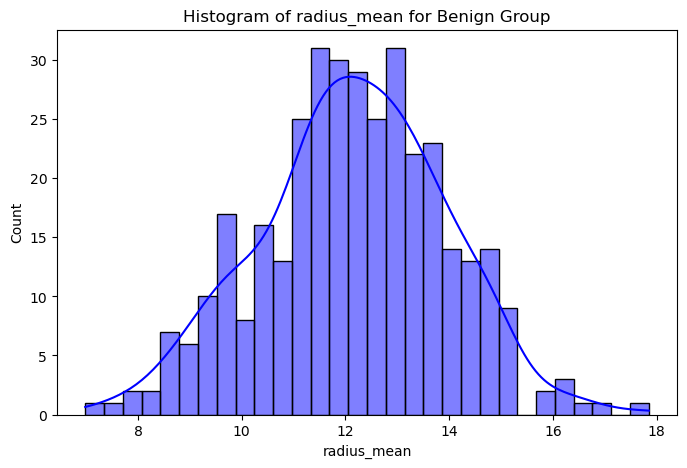

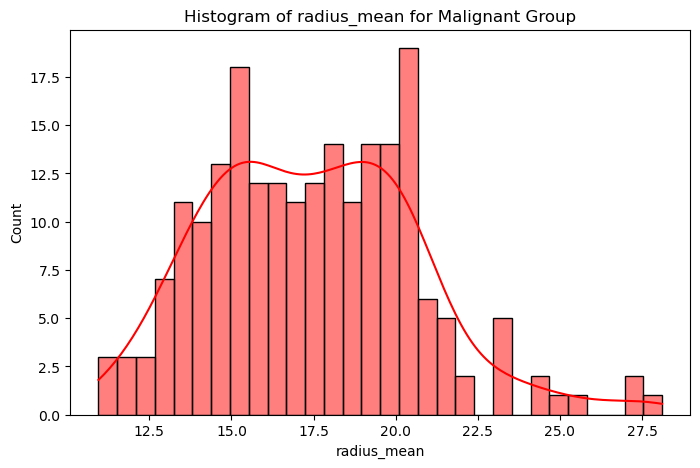

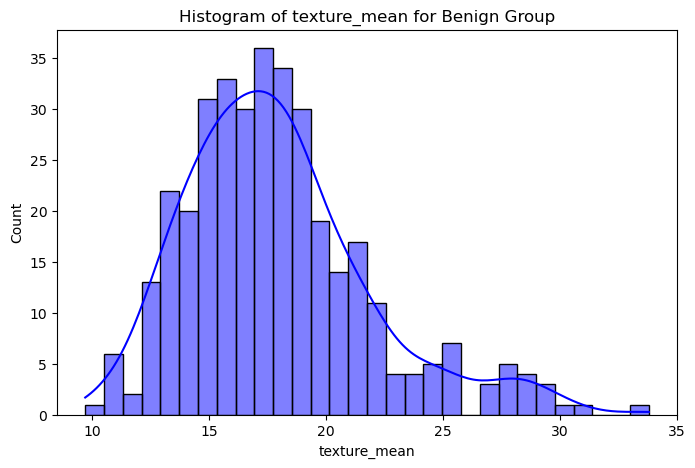

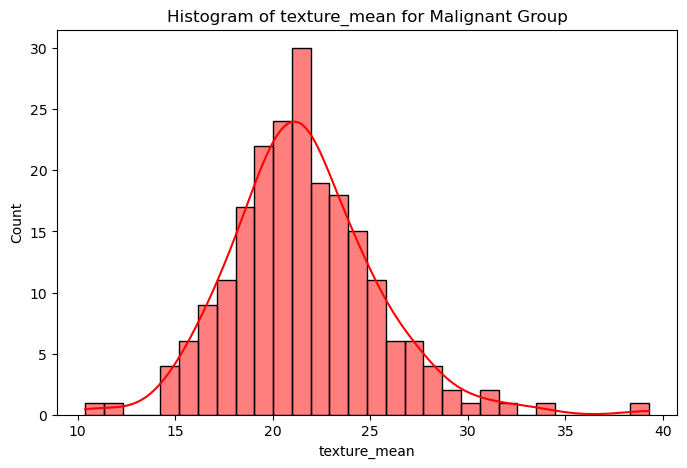

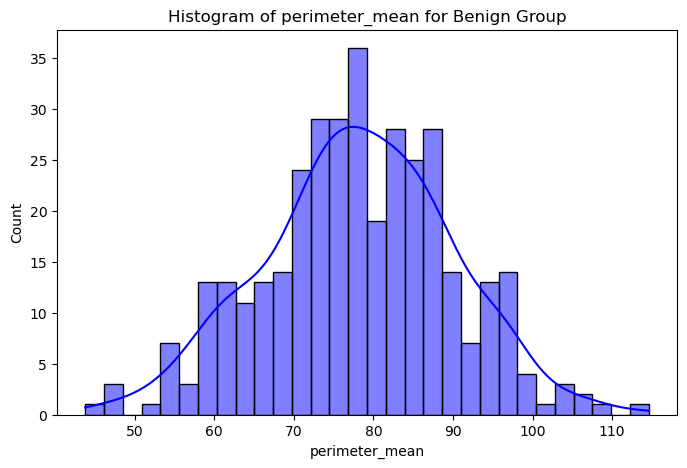

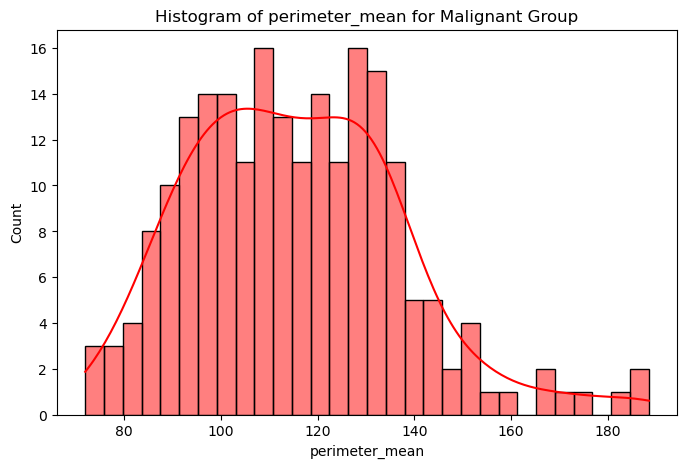

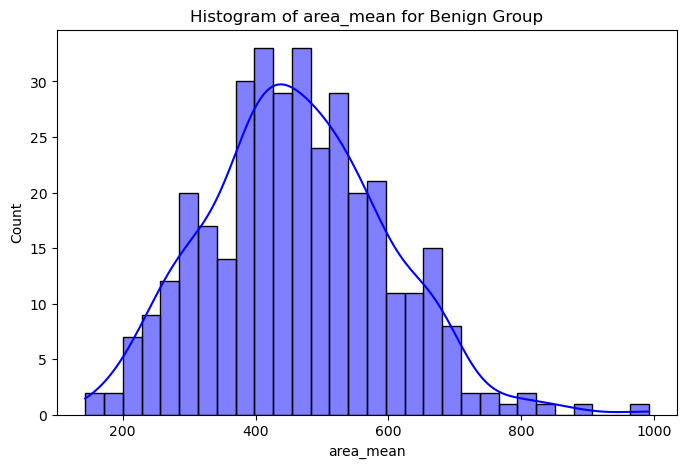

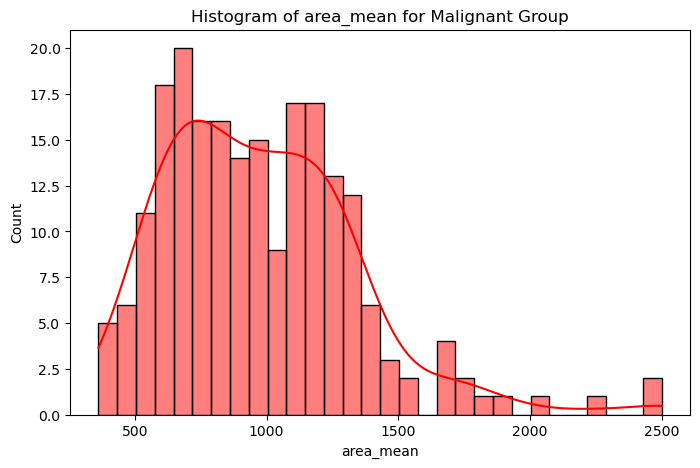

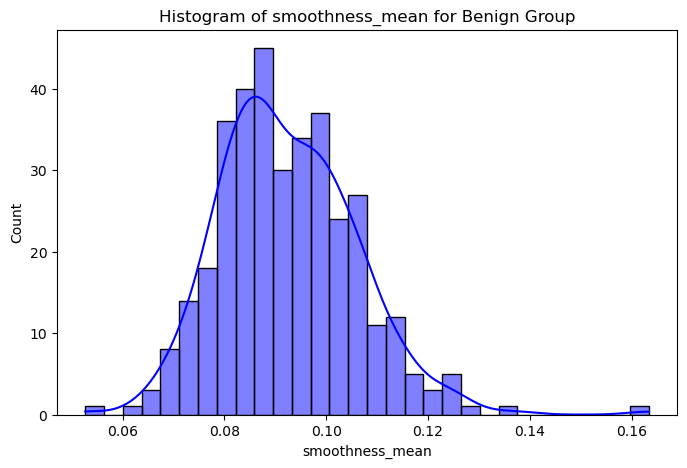

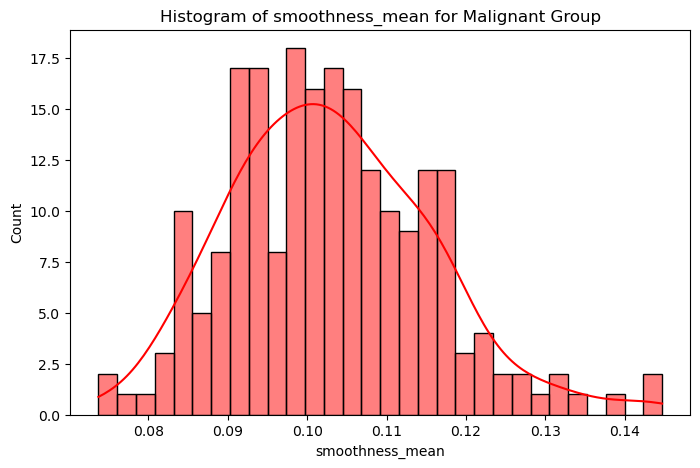

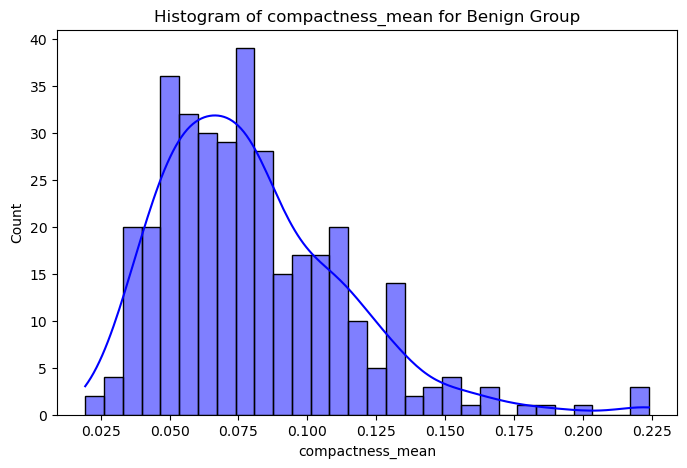

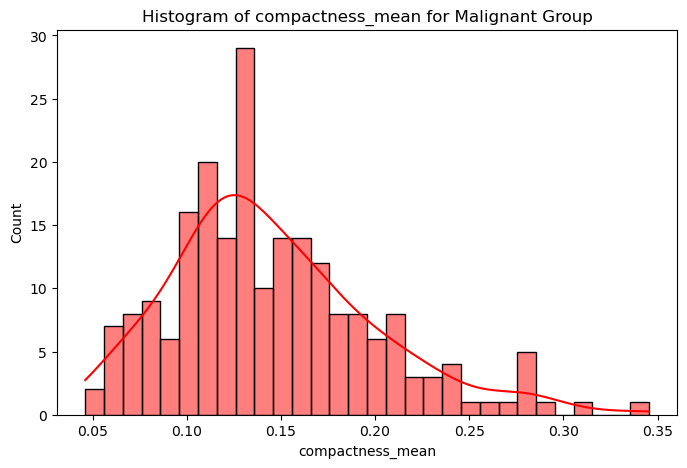

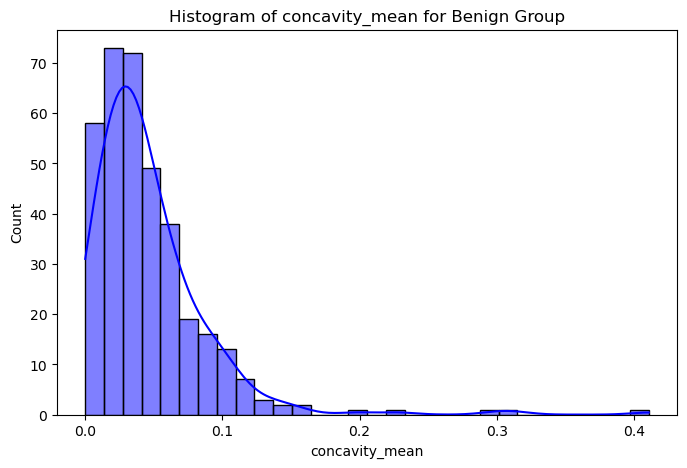

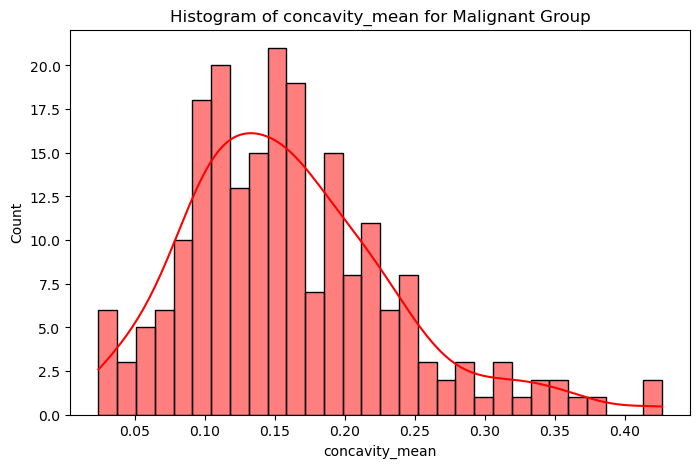

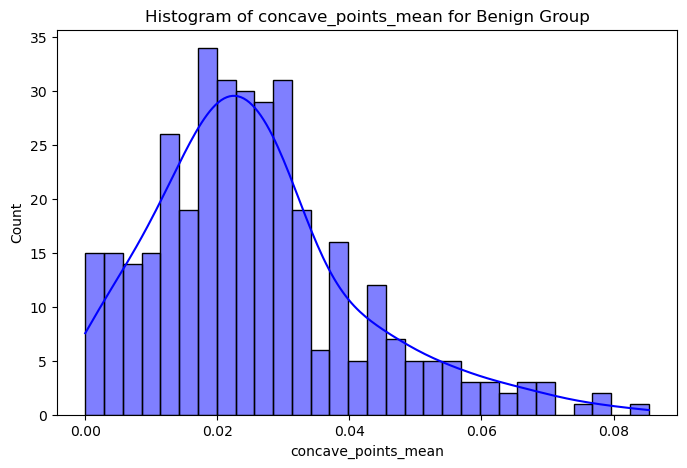

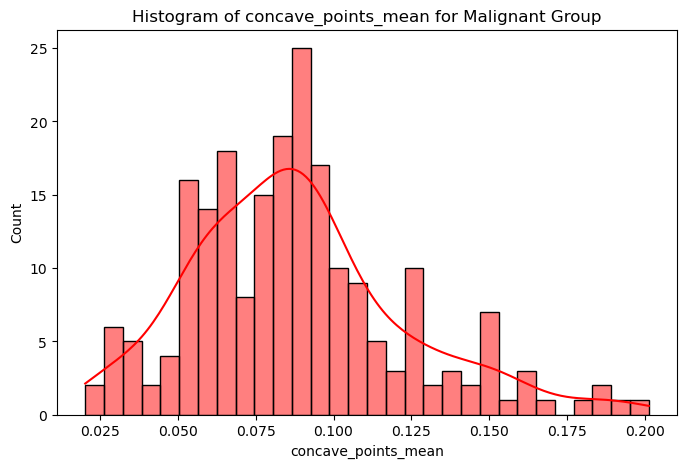

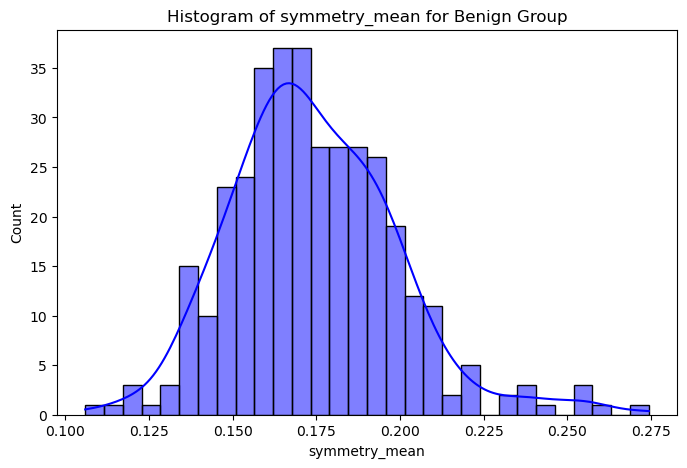

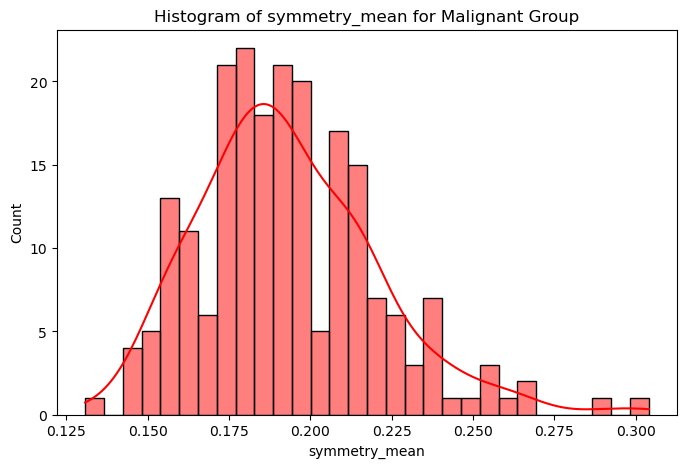

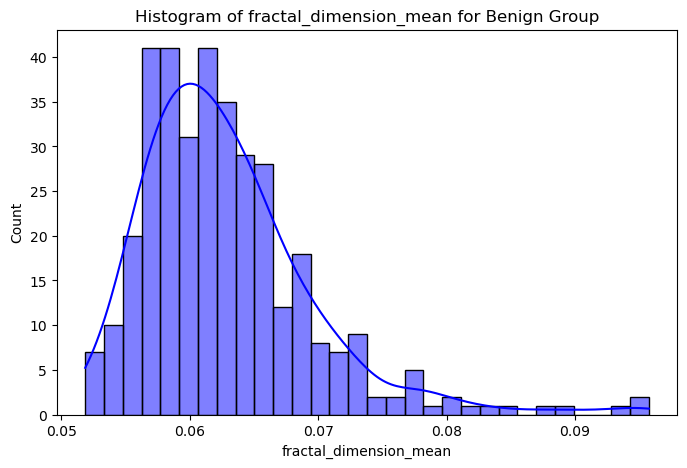

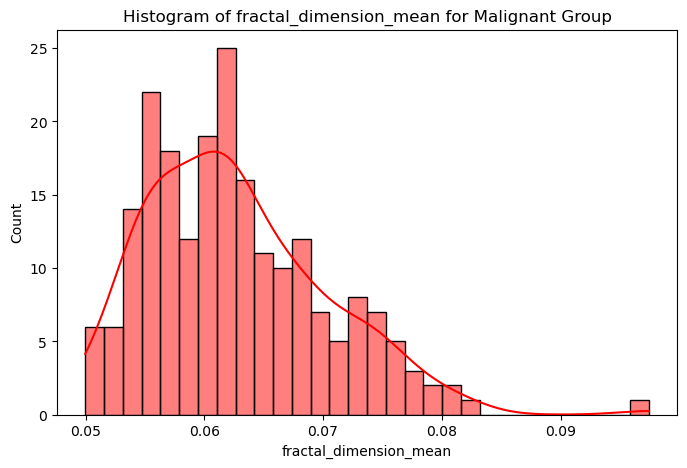

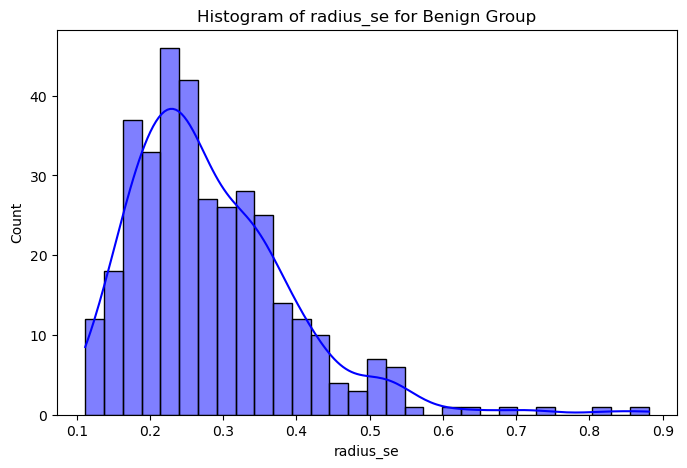

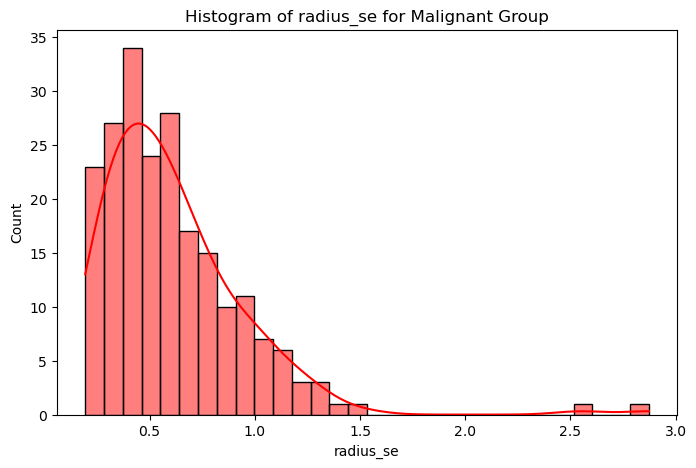

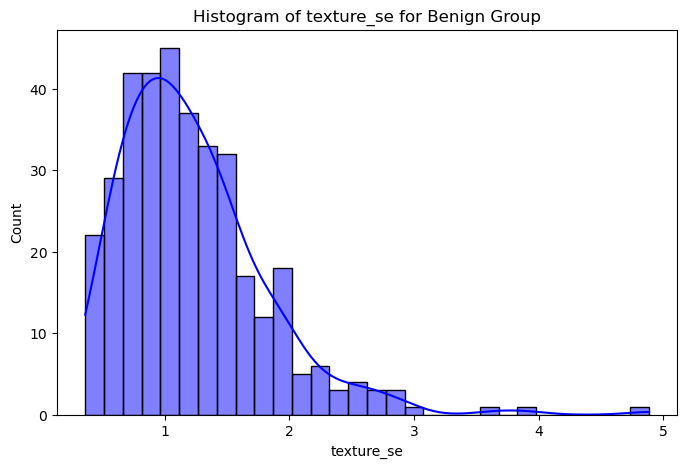

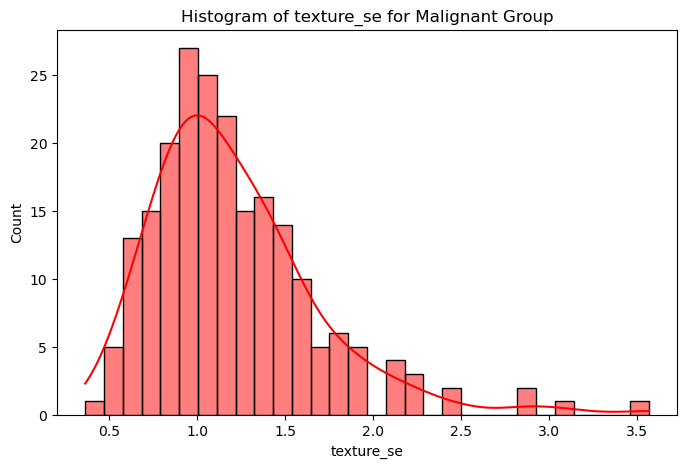

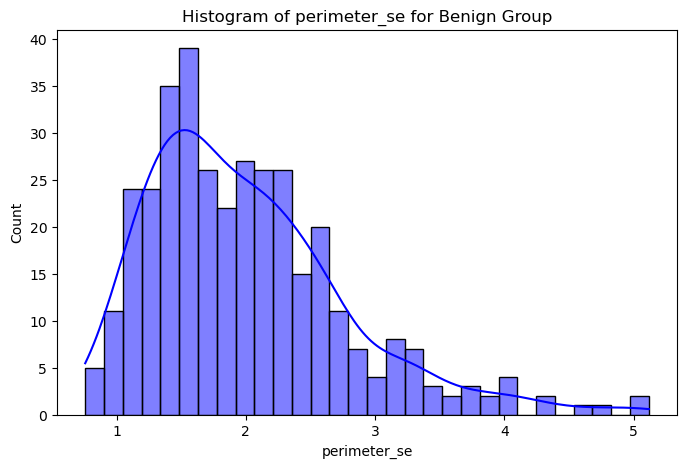

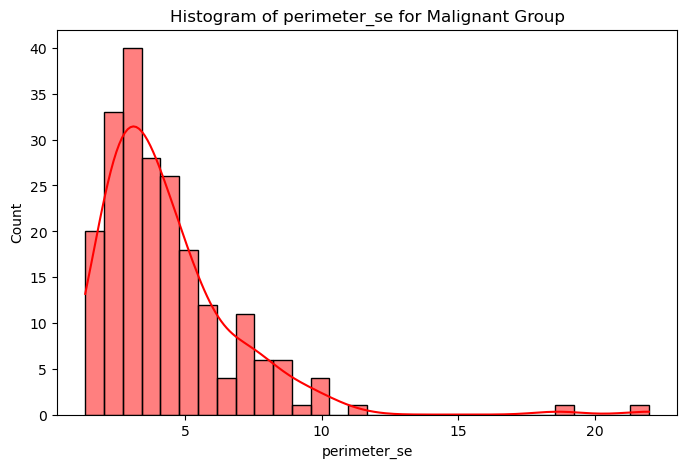

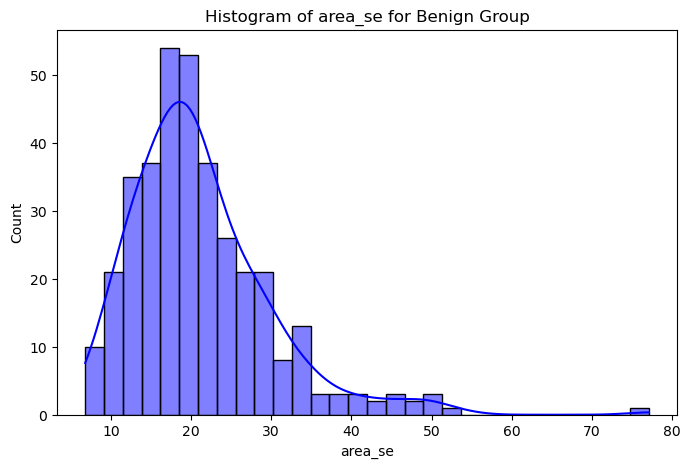

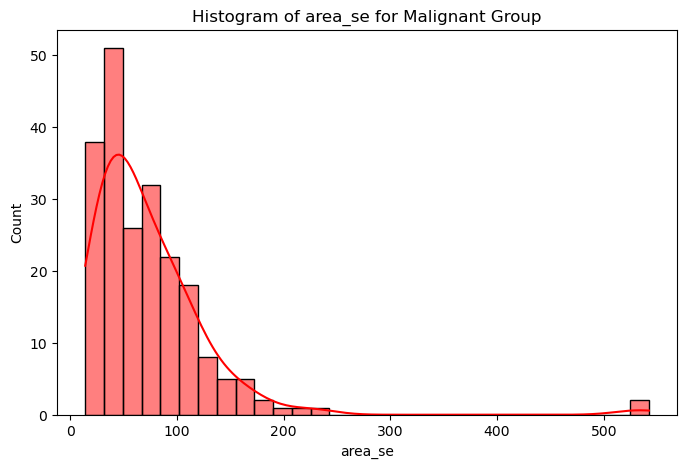

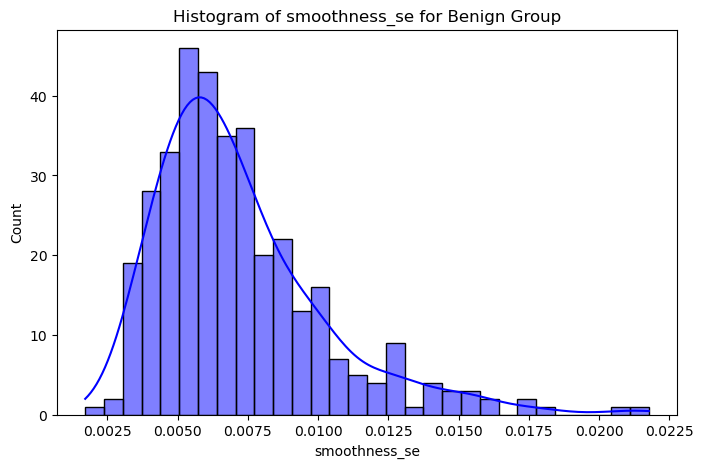

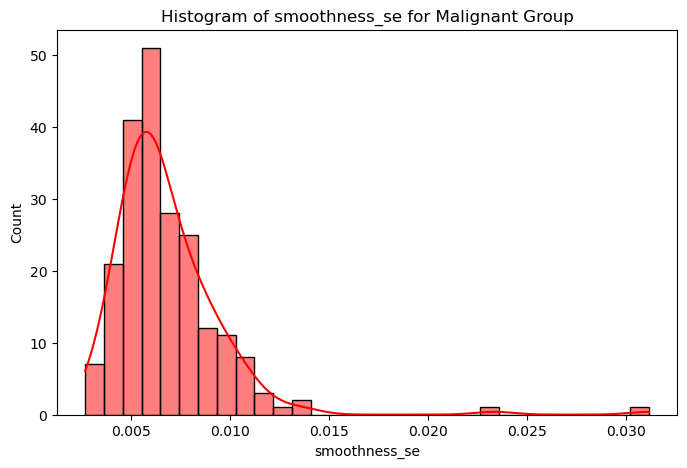

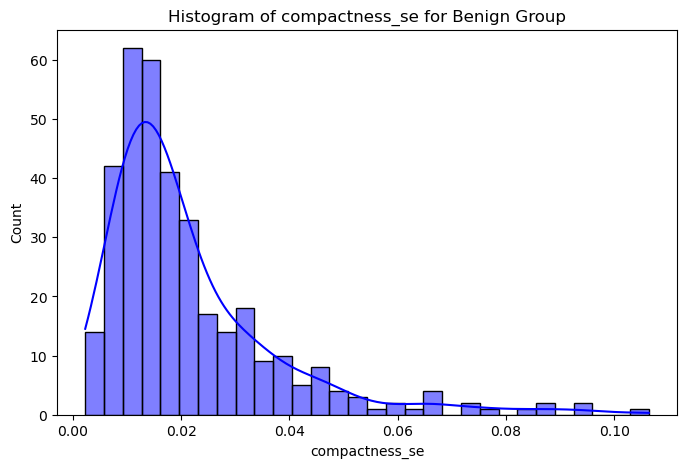

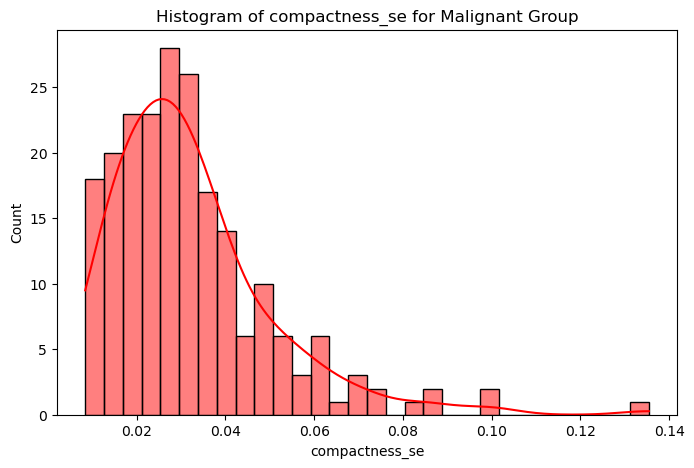

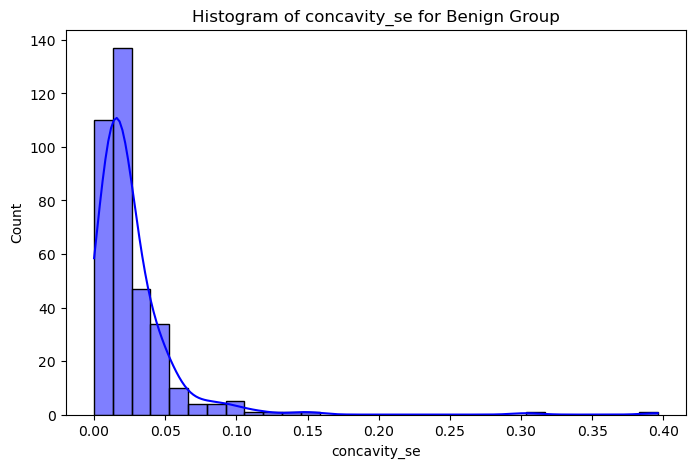

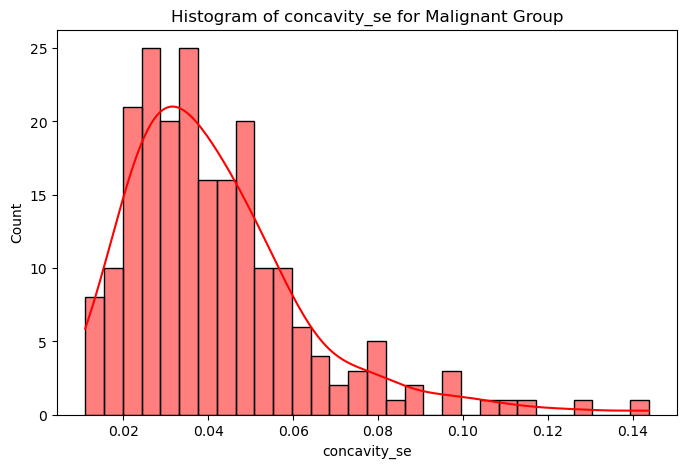

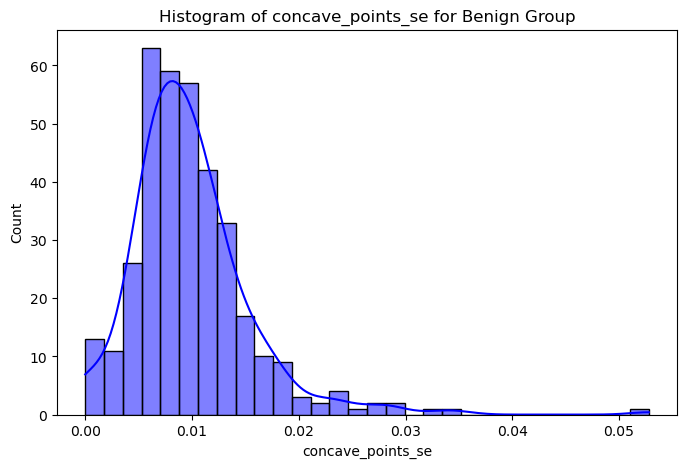

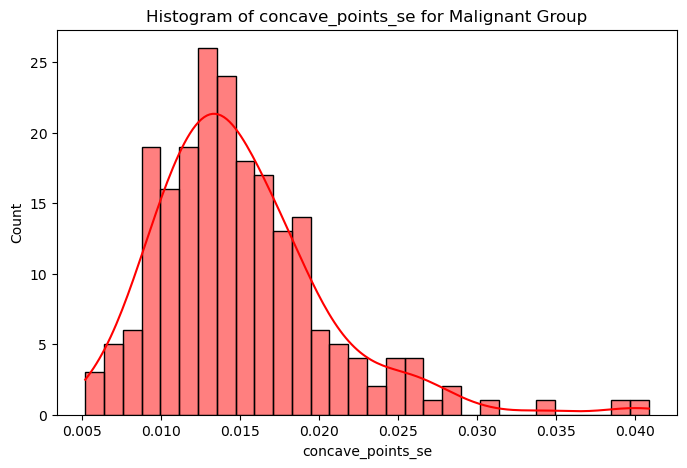

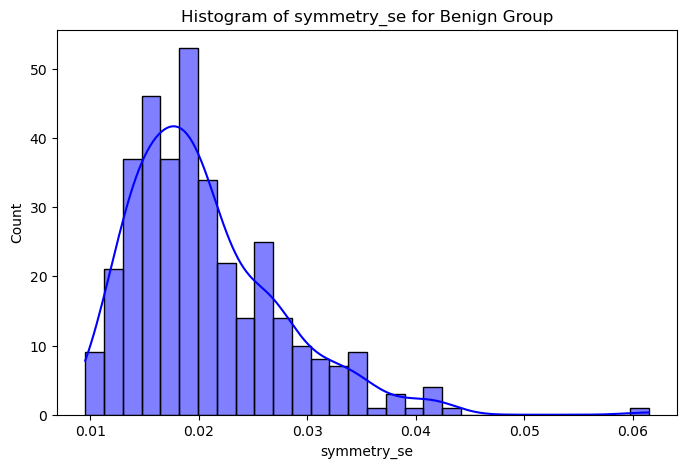

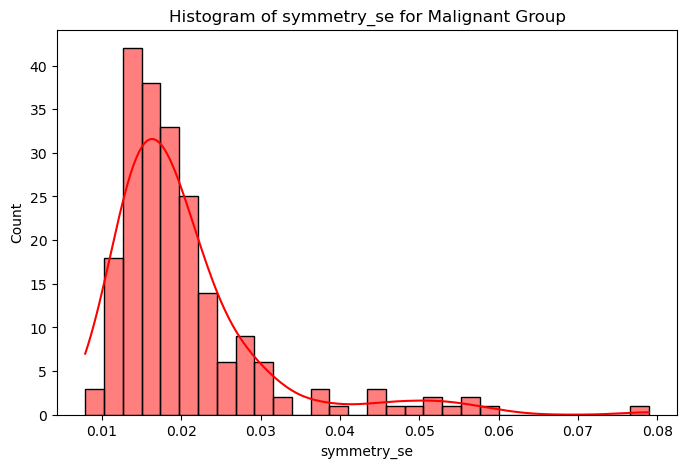

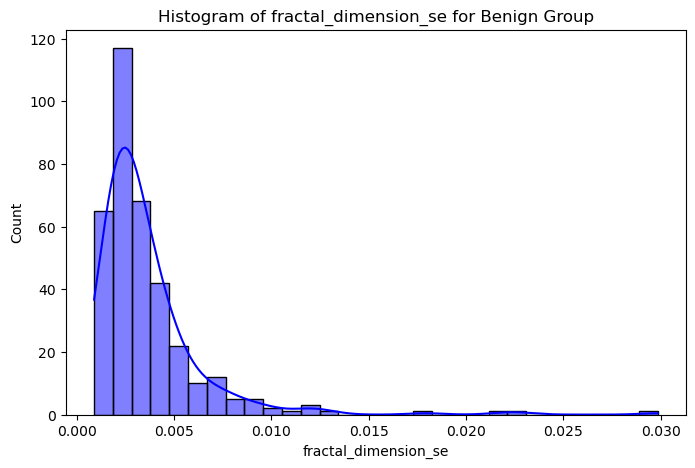

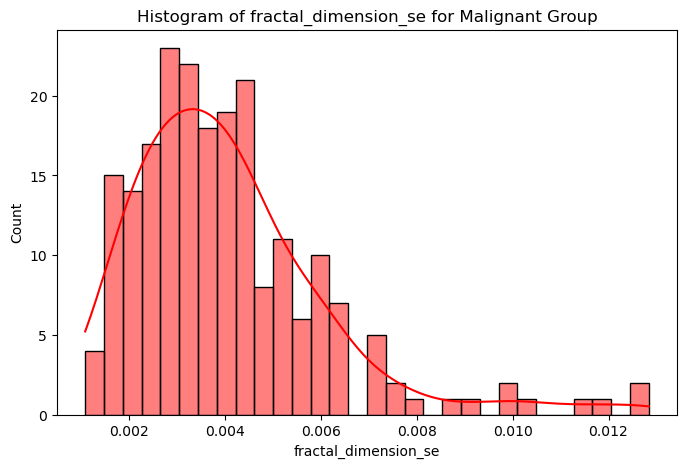

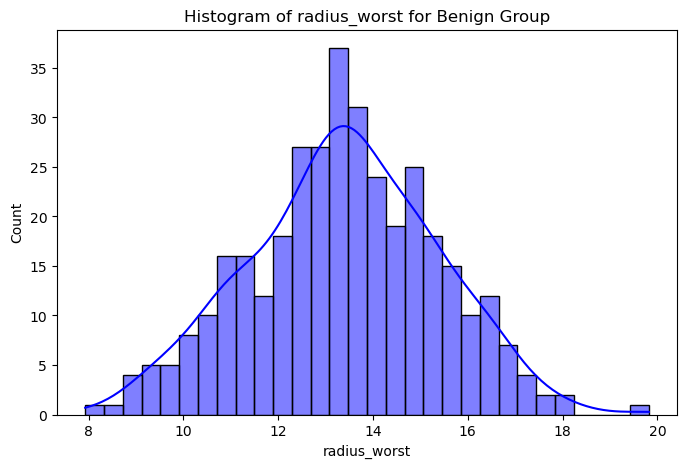

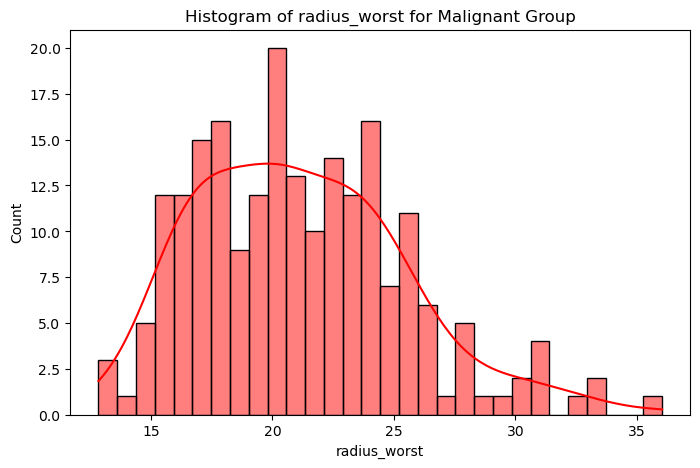

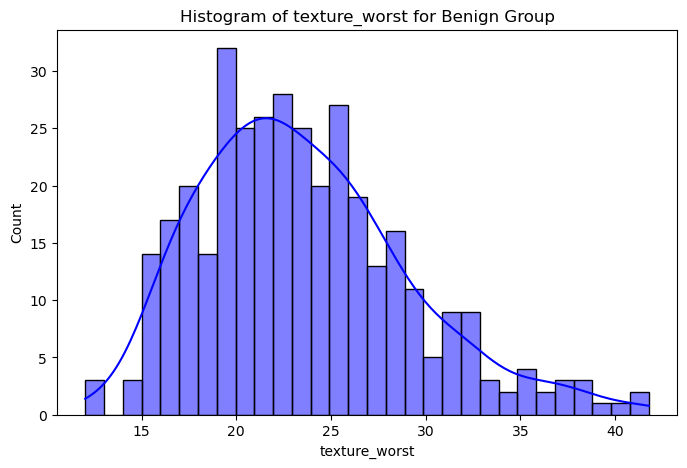

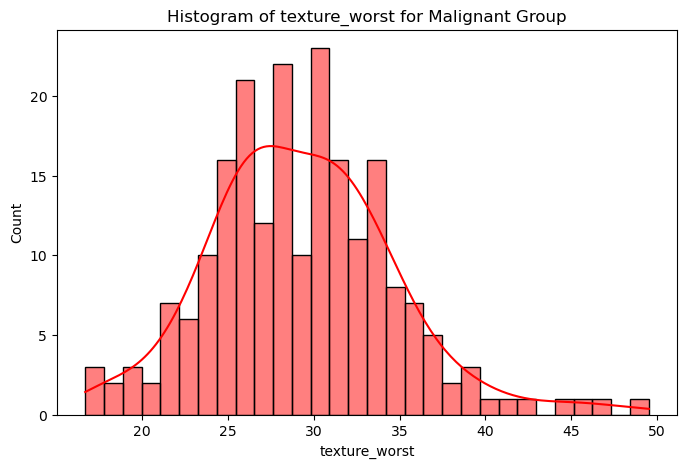

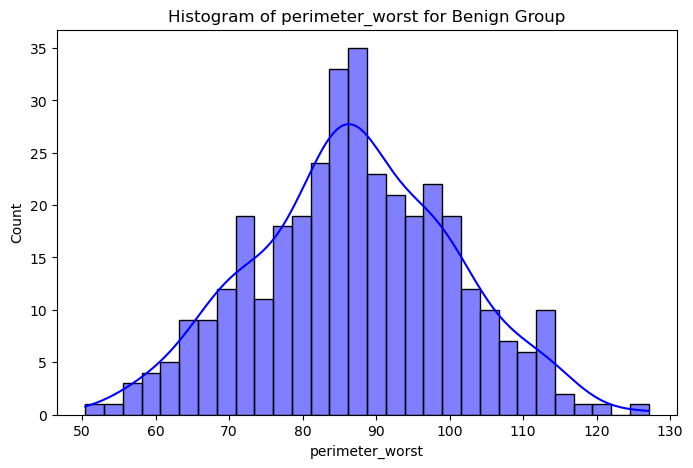

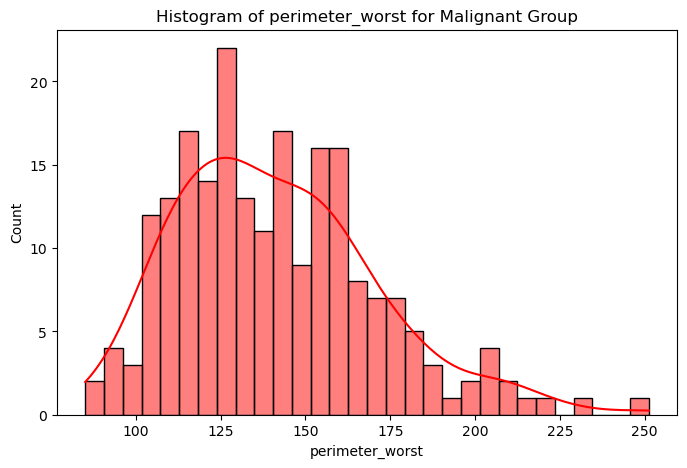

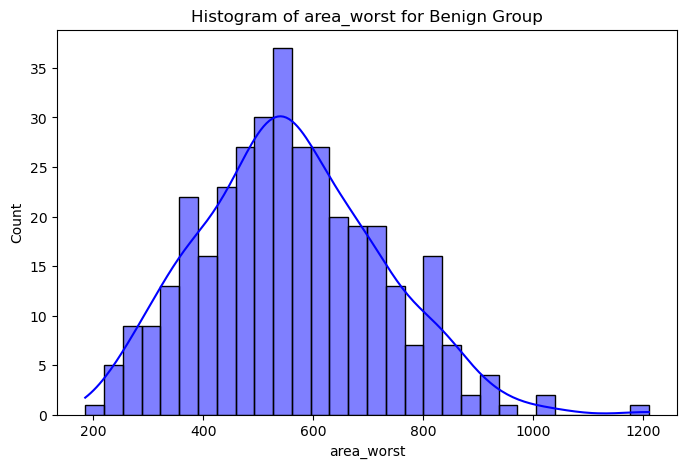

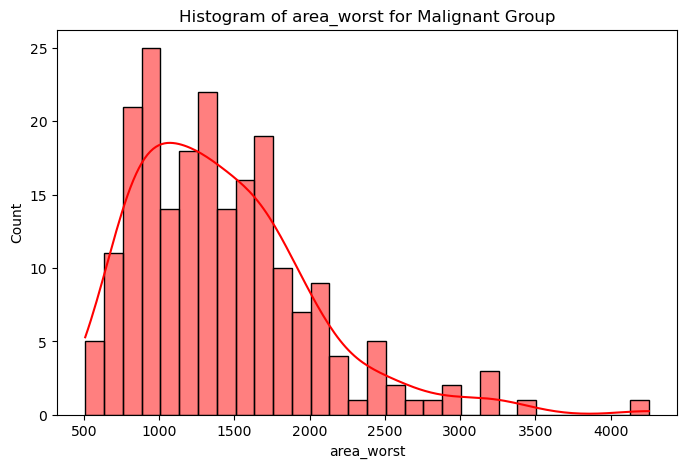

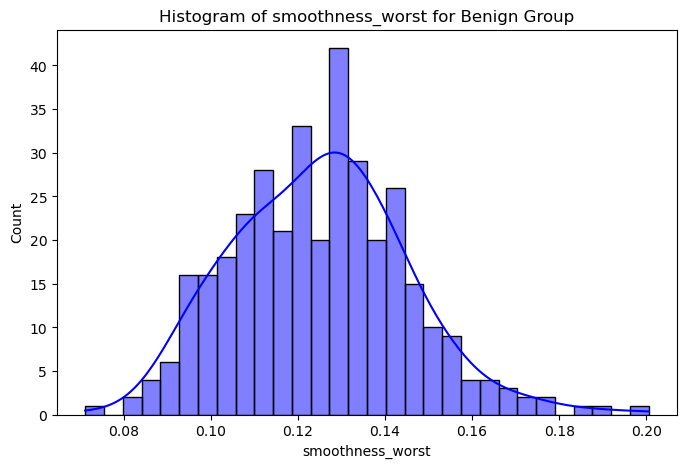

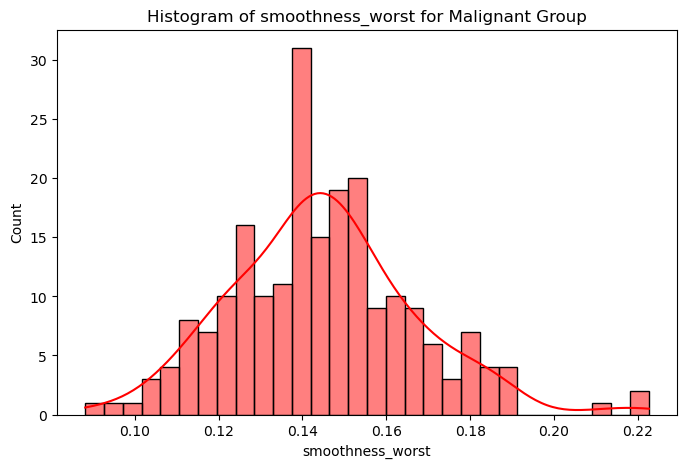

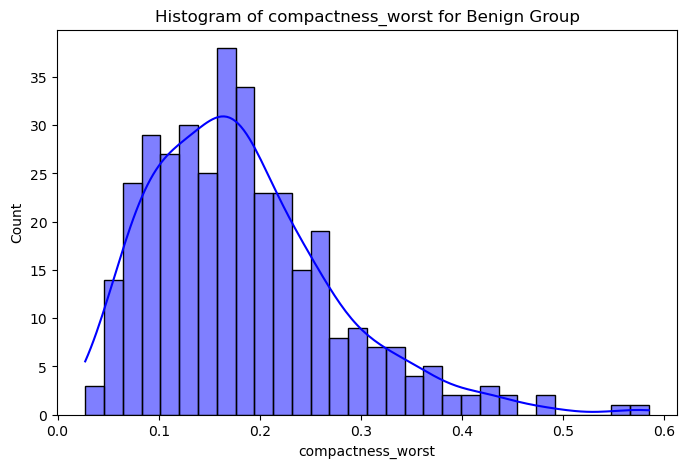

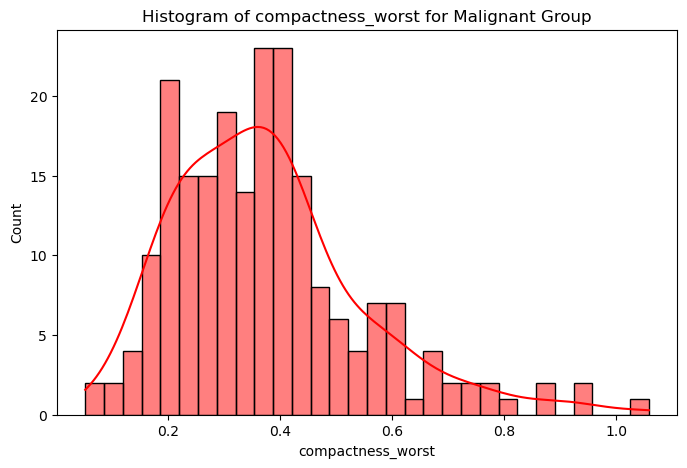

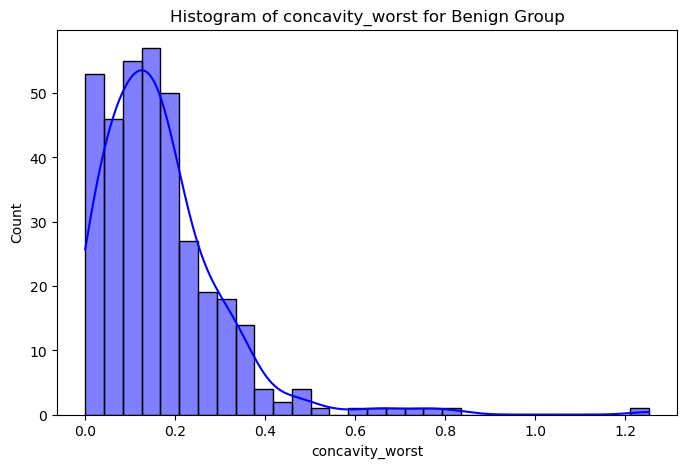

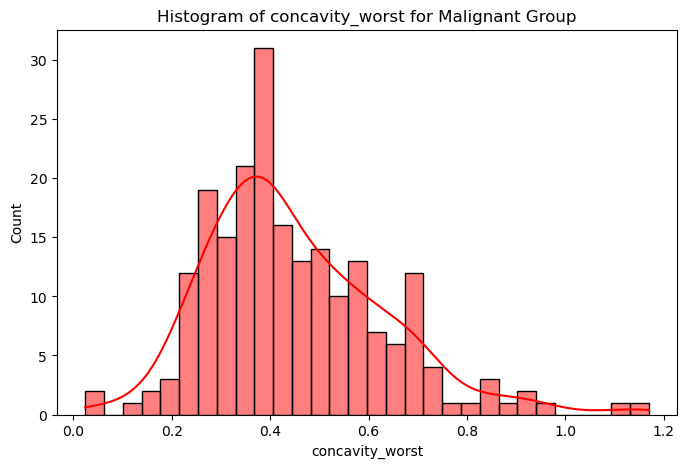

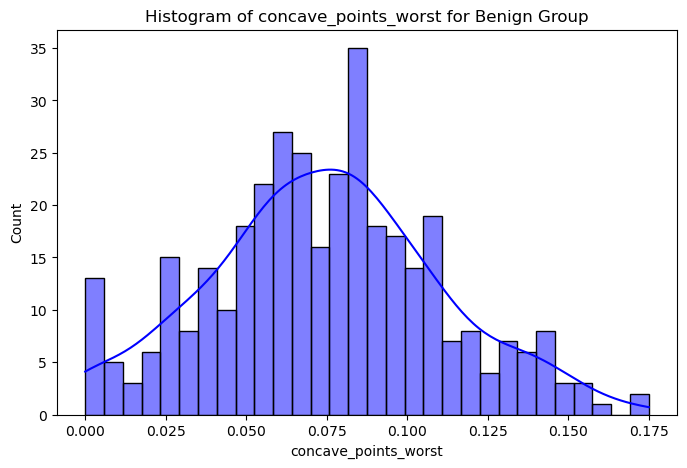

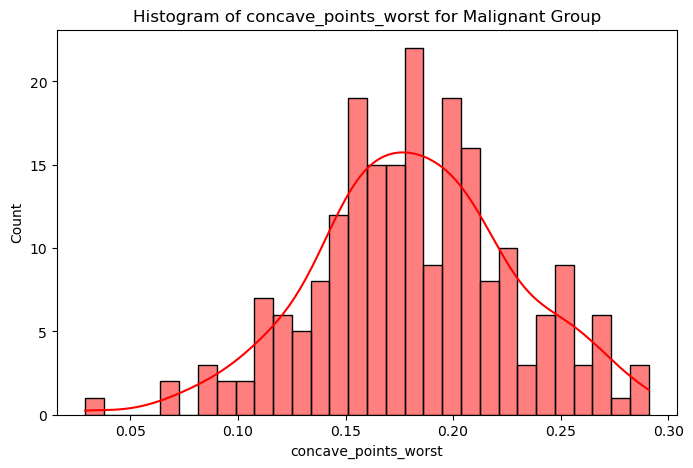

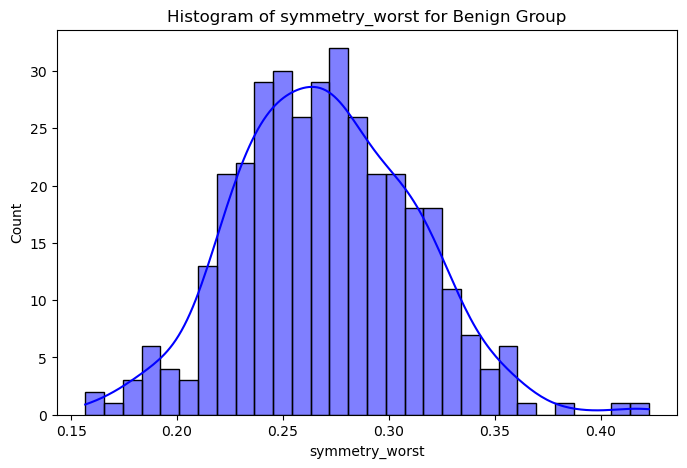

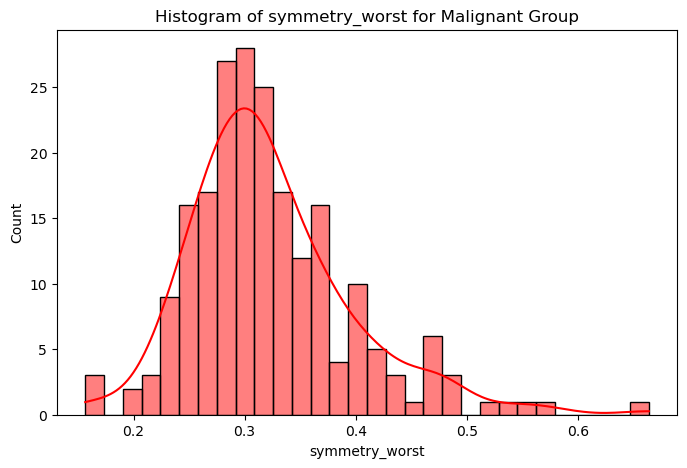

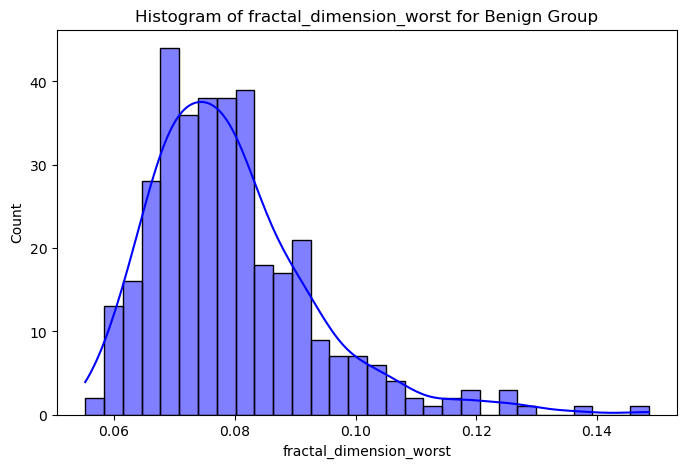

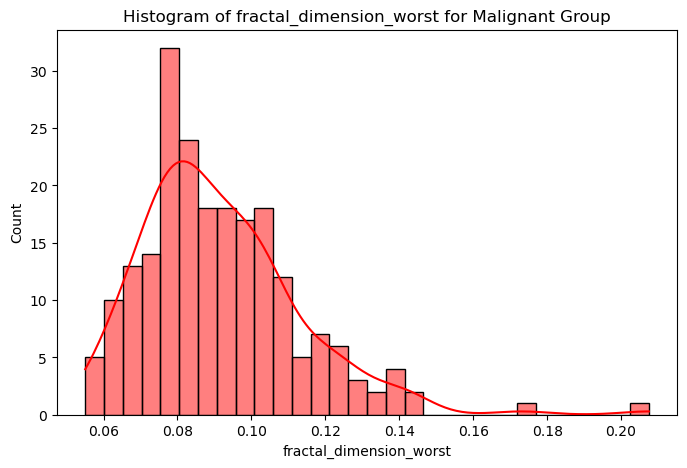

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check histograms for each features by group
for feature in features:
    #Plot for Benign group (Diagnosis==0)
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df[df['Diagnosis']==0], x=feature, kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {feature} for Benign Group')
    plt.show()

    #Plot for Malignant group (Diagnosis==1)
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df[df['Diagnosis']==1], x=feature, kde=True, bins=30, color='red')
    plt.title(f'Histogram of {feature} for Malignant Group')
    plt.show()

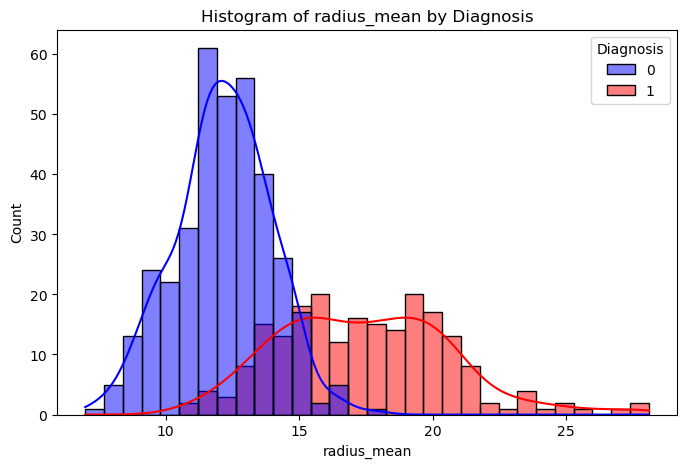

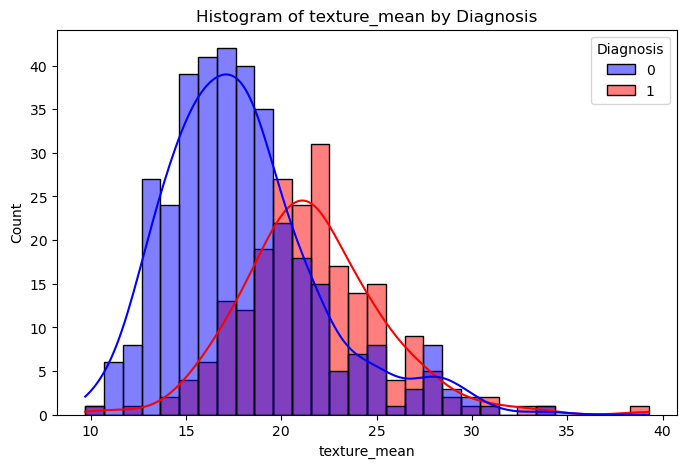

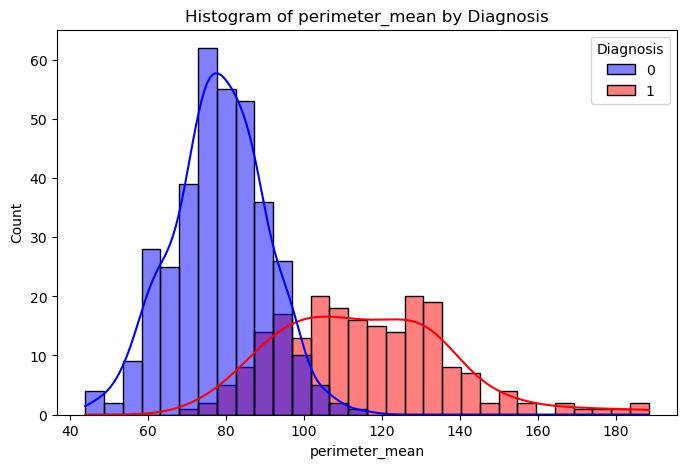

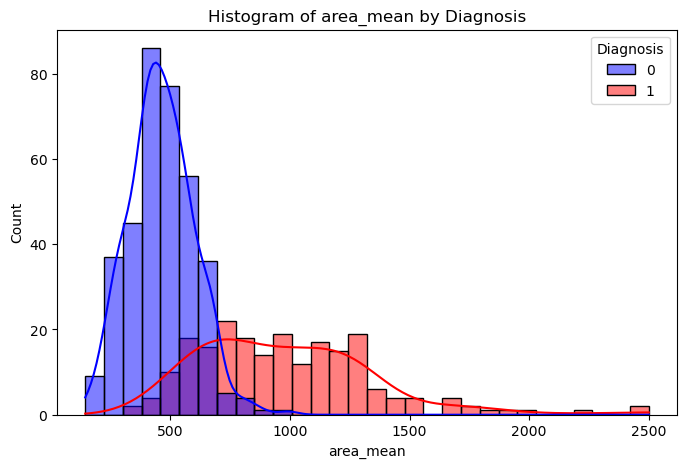

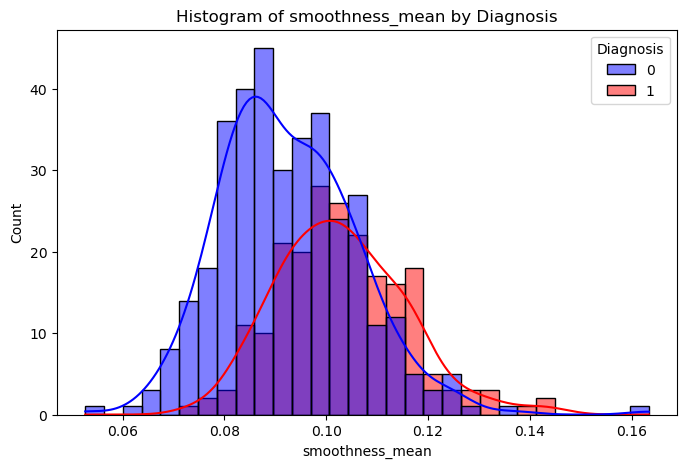

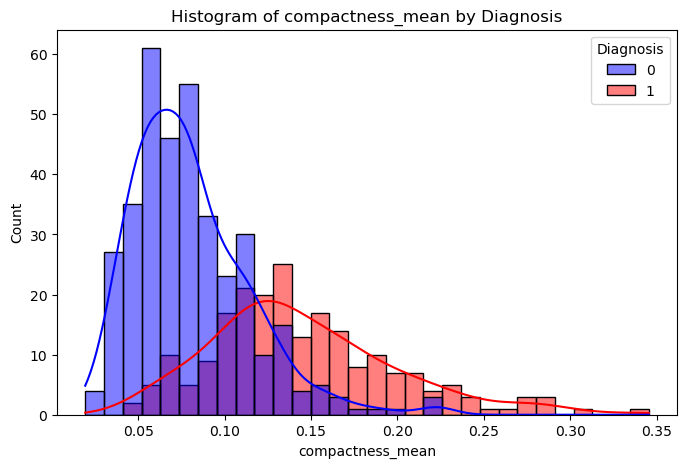

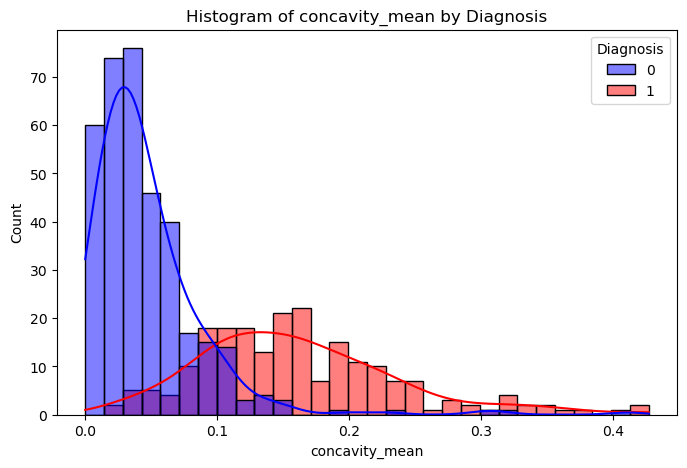

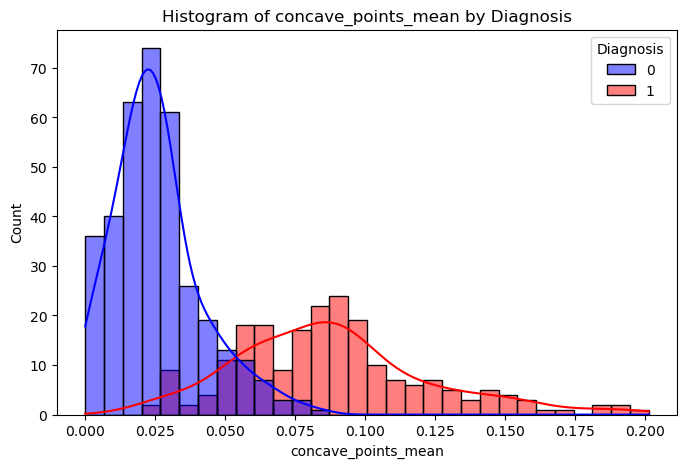

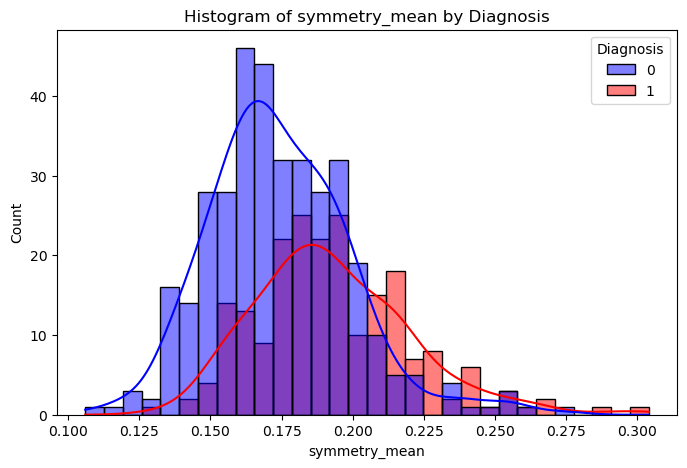

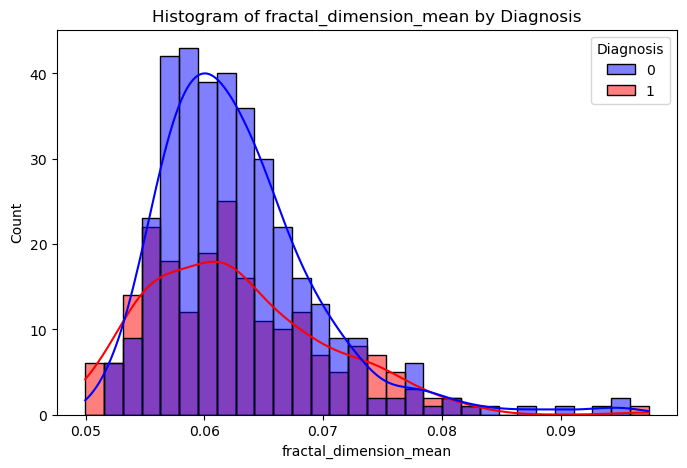

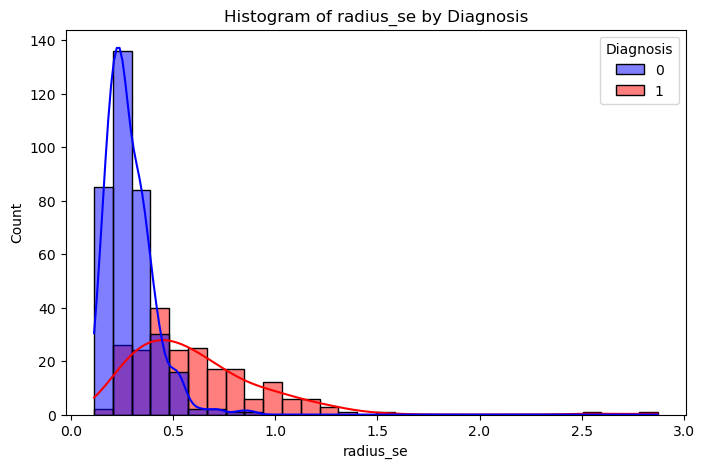

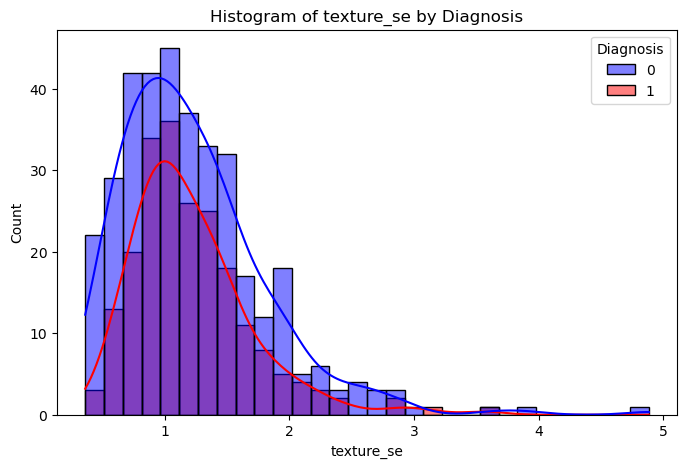

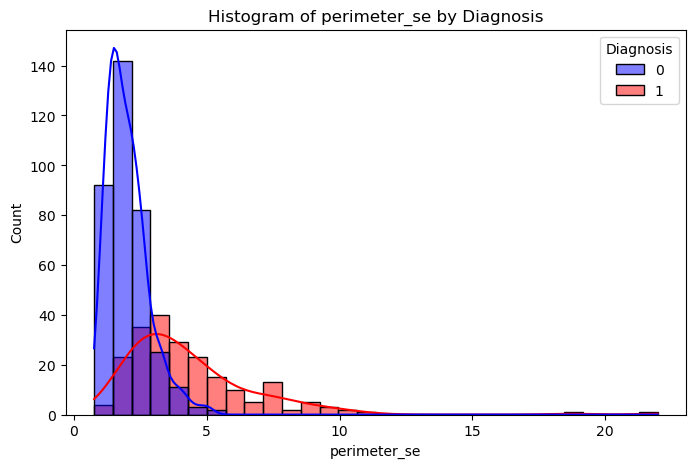

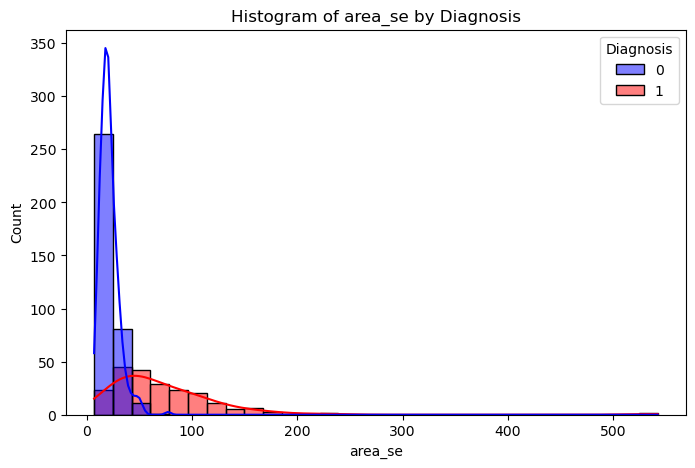

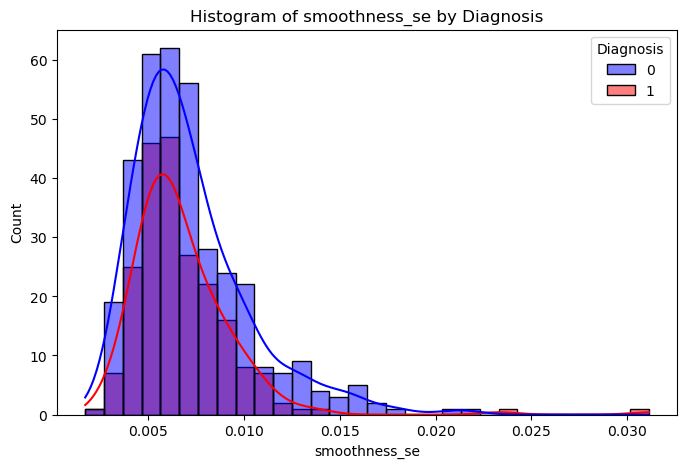

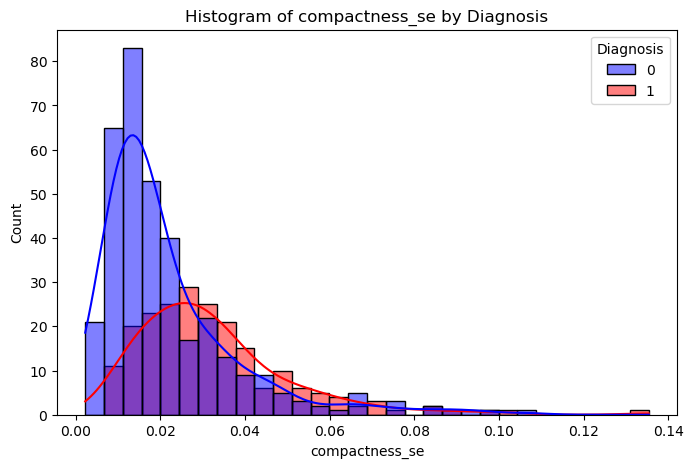

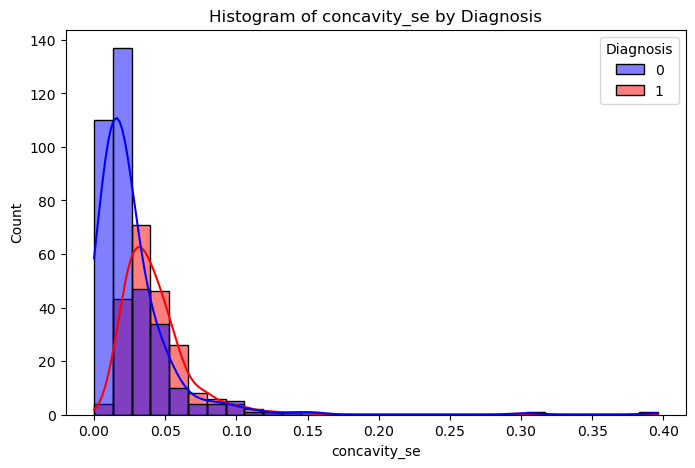

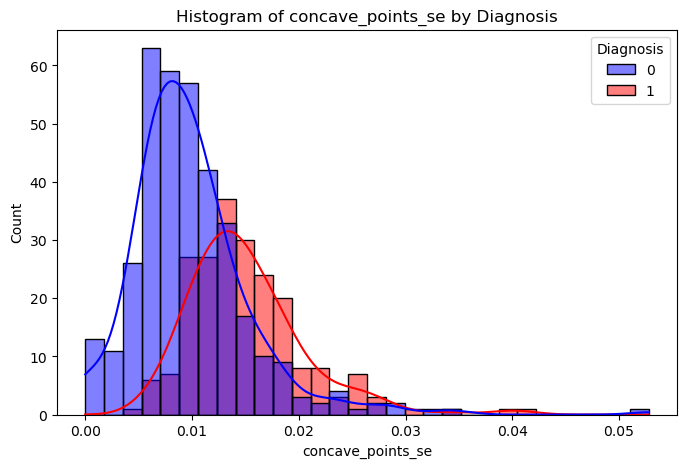

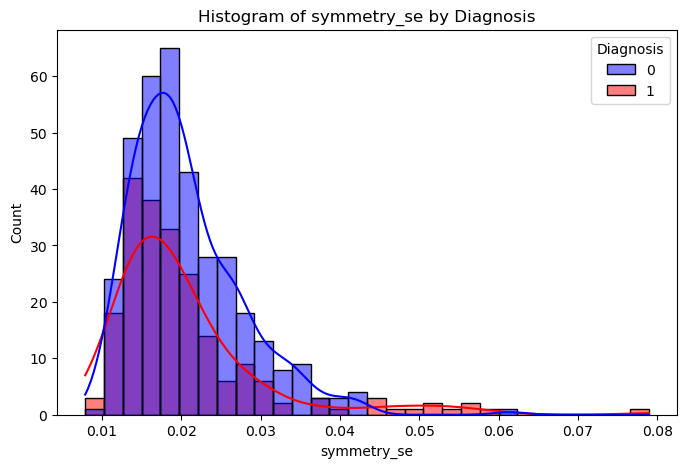

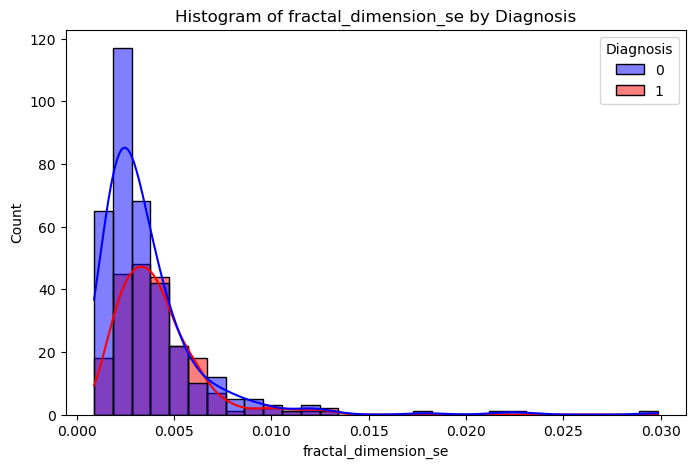

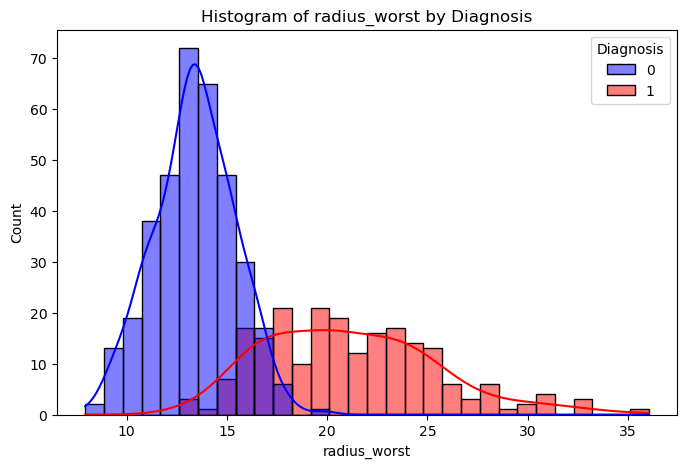

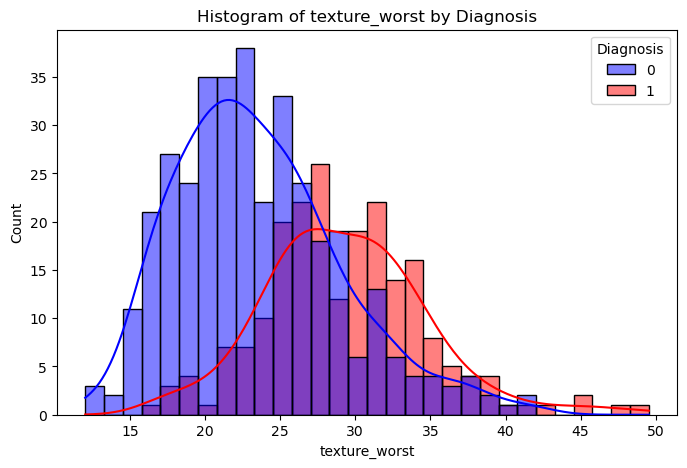

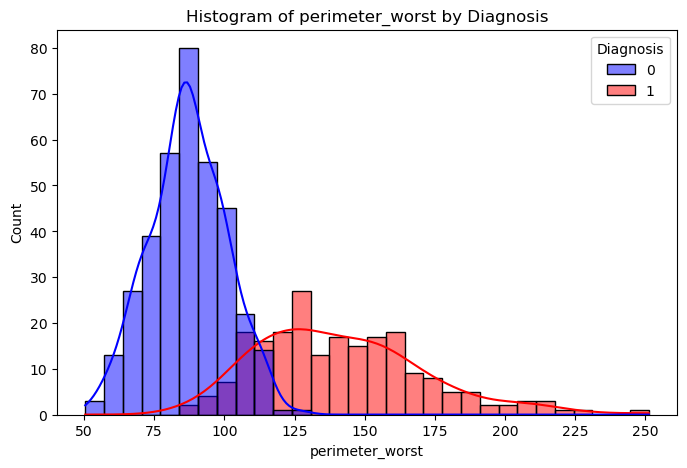

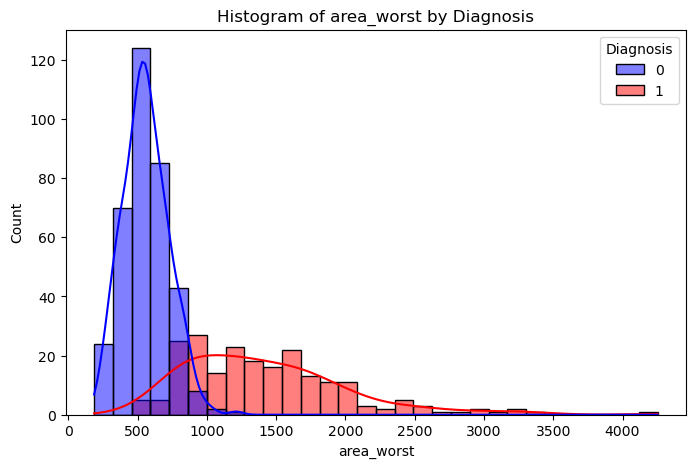

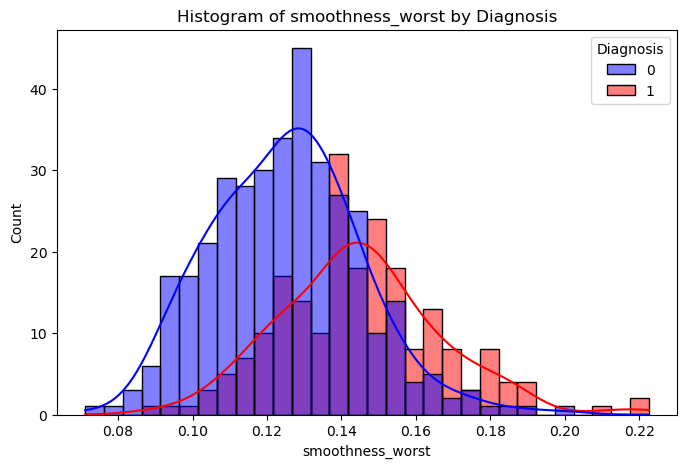

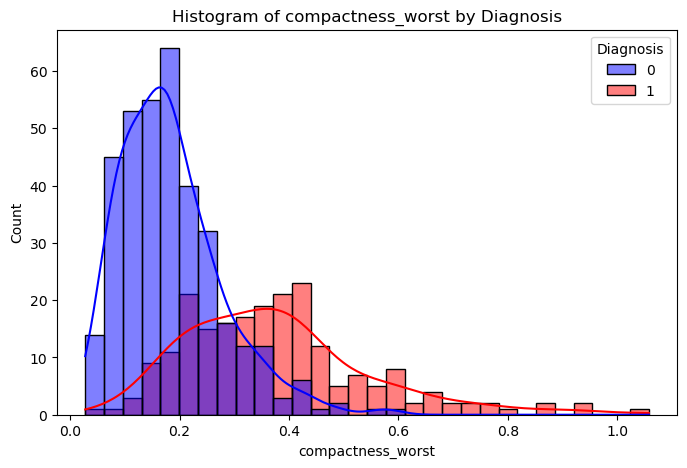

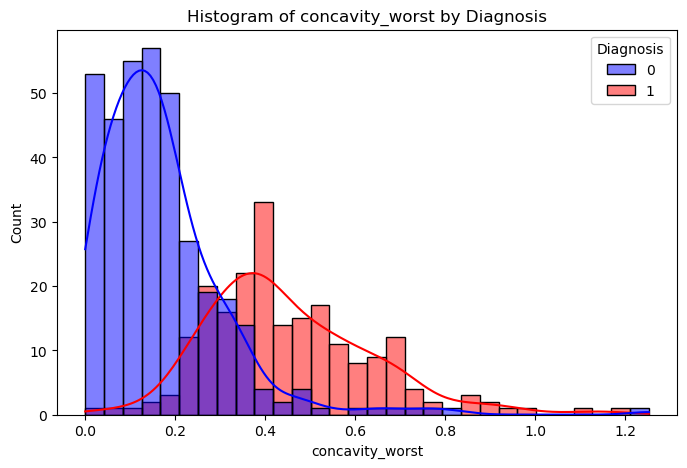

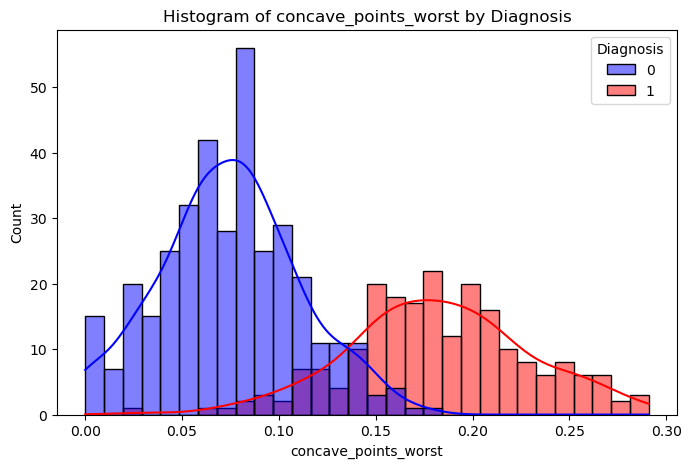

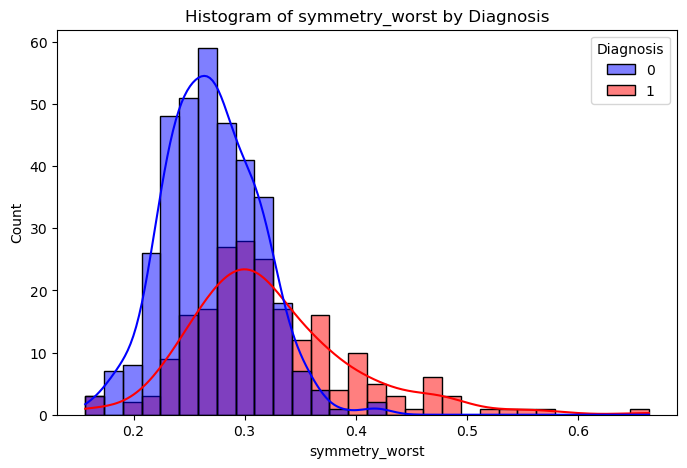

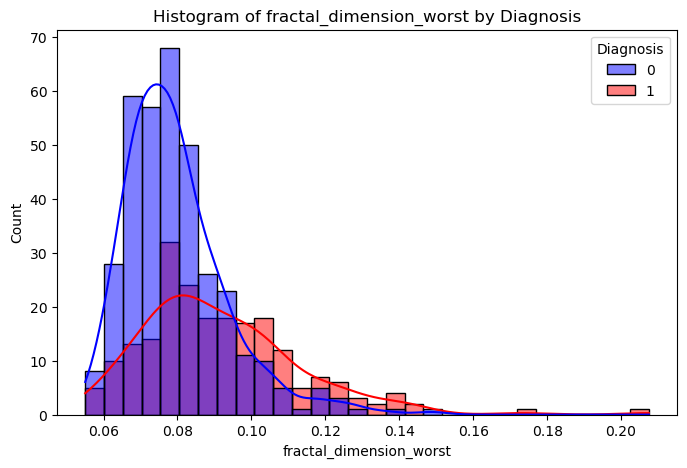

In [12]:
#Check histograms for ALL groups
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='Diagnosis', kde=True, bins=30,
                 palette={0: 'blue', 1: 'red'})  # Assign custom colors
    plt.title(f'Histogram of {feature} by Diagnosis')
    plt.show()

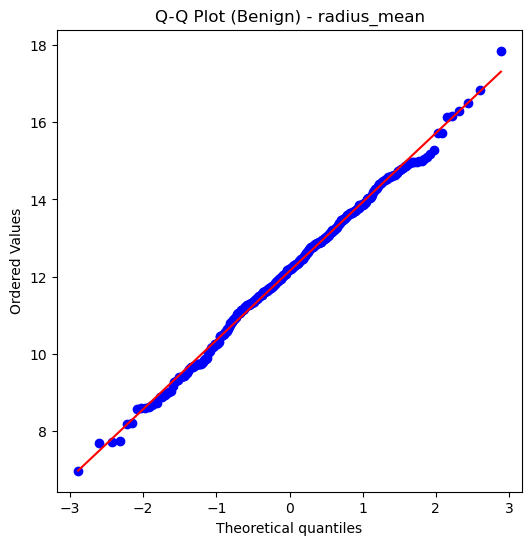

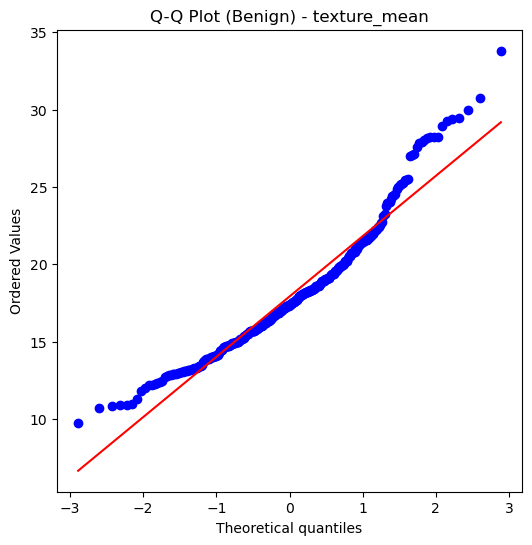

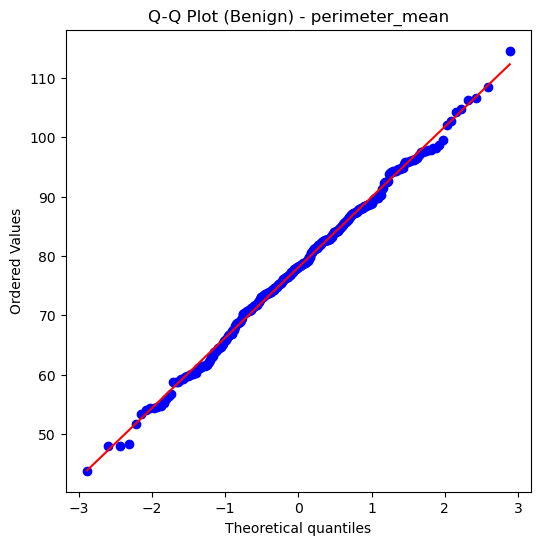

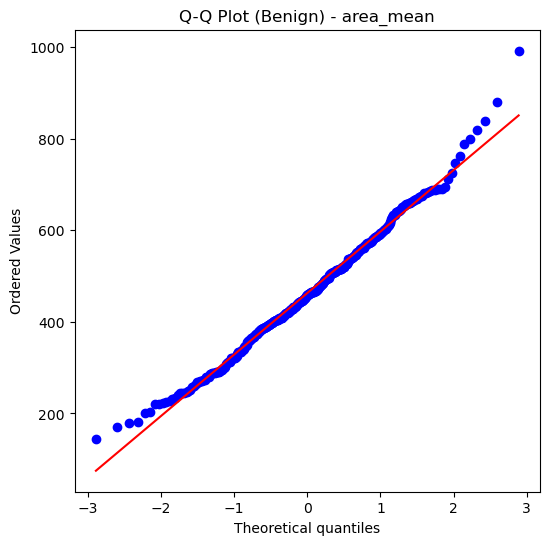

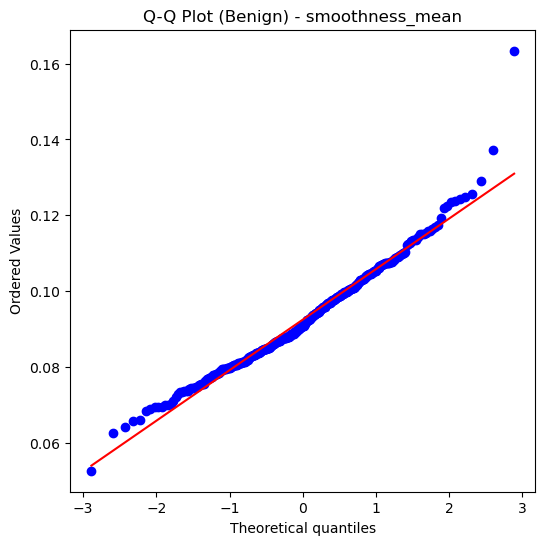

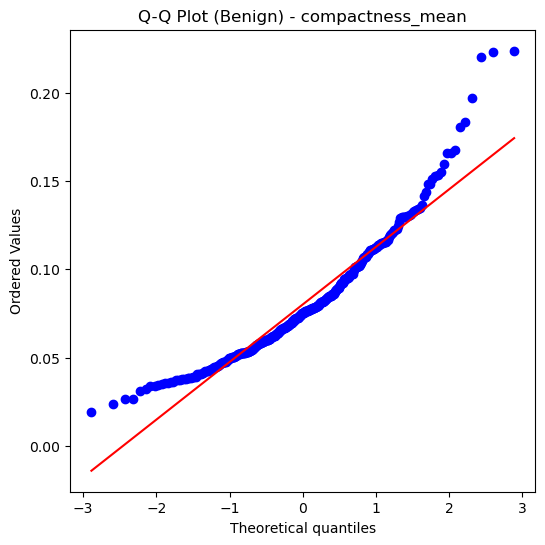

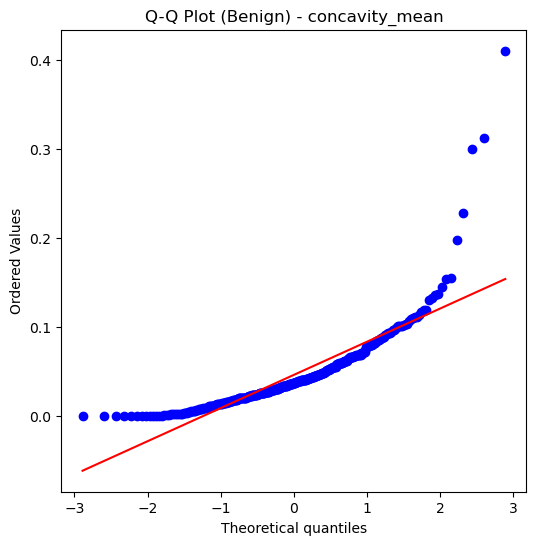

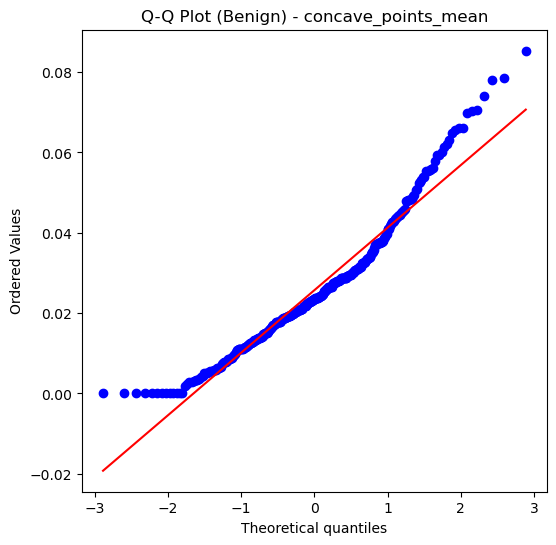

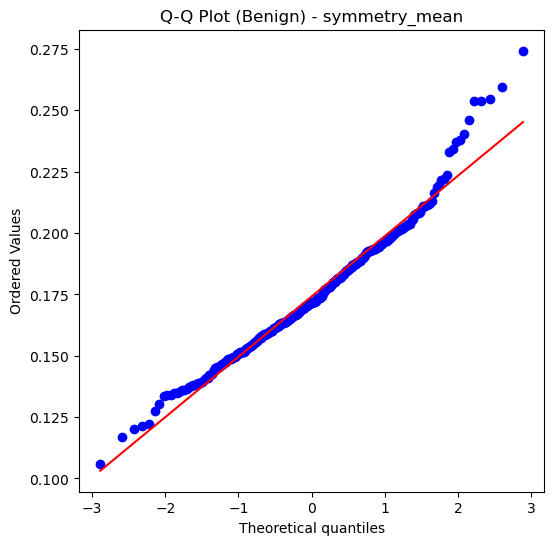

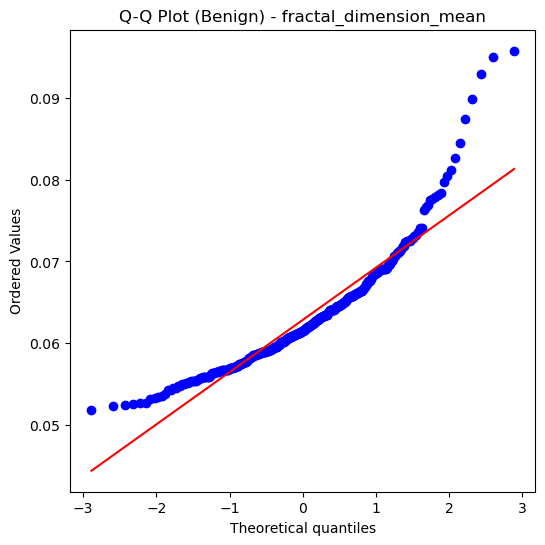

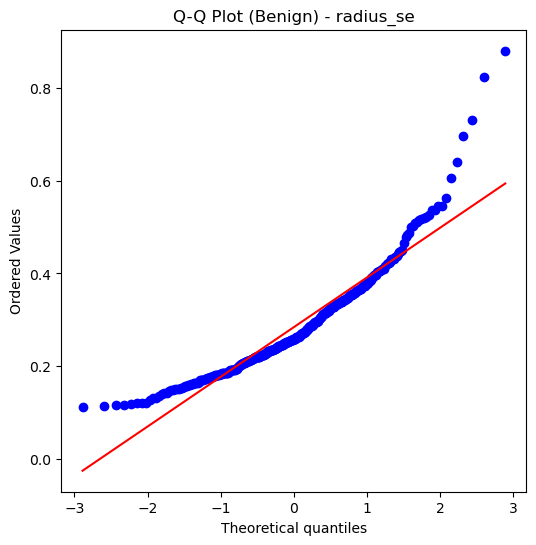

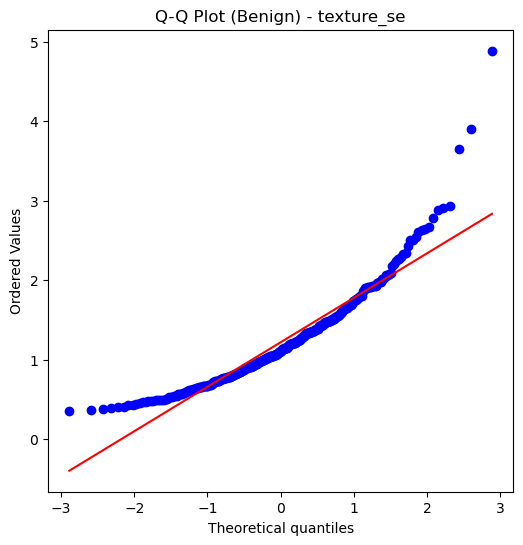

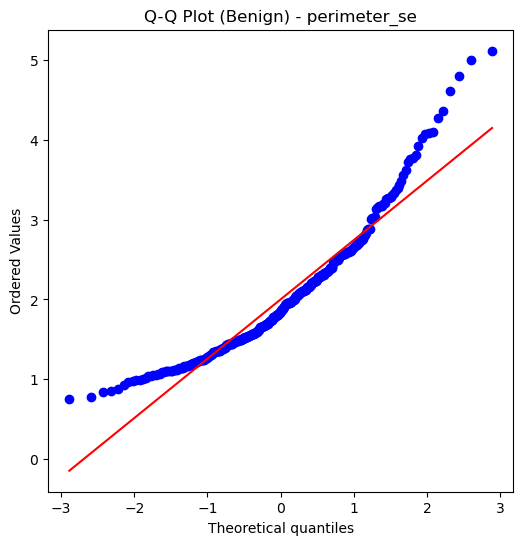

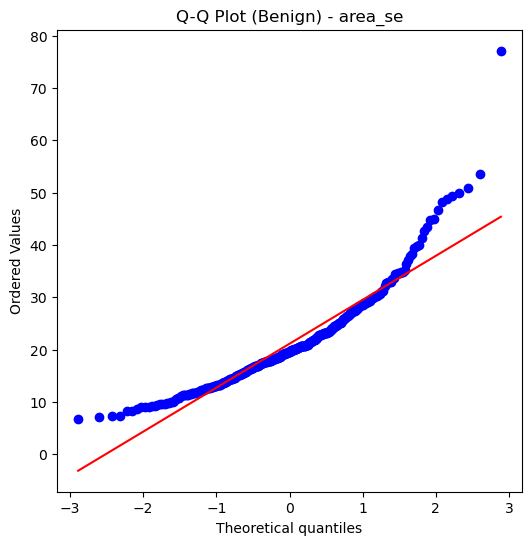

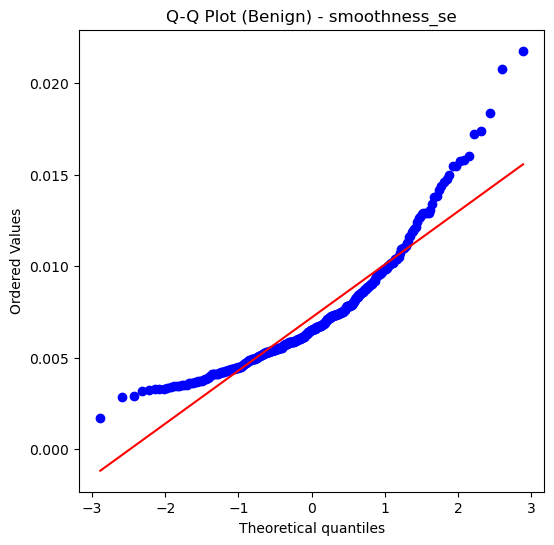

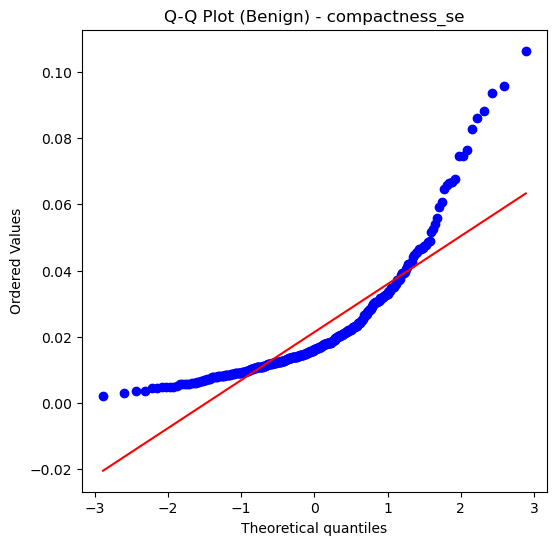

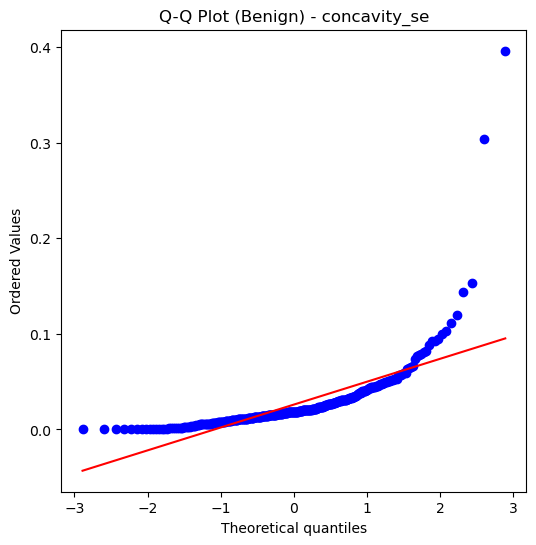

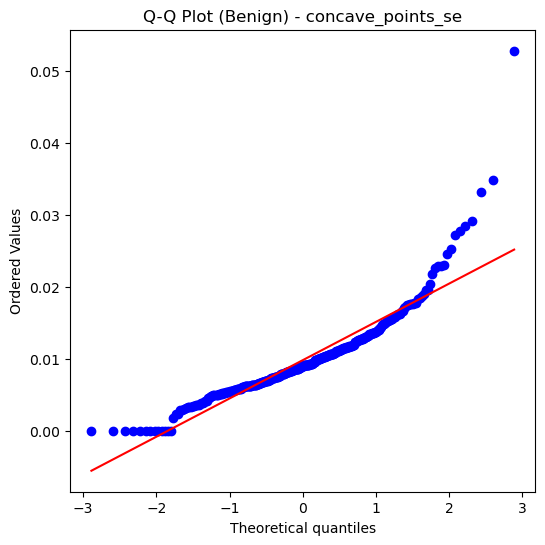

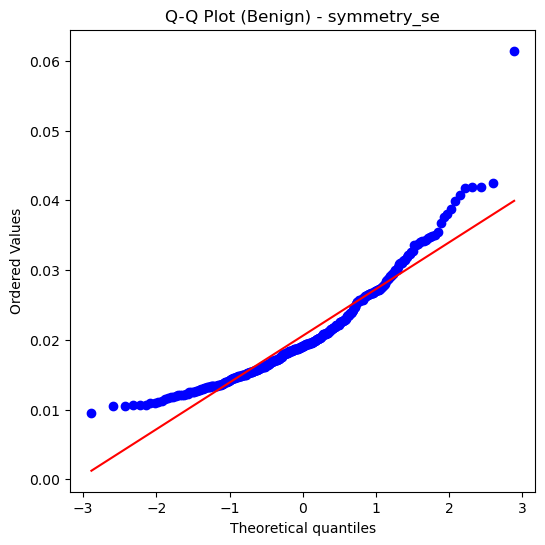

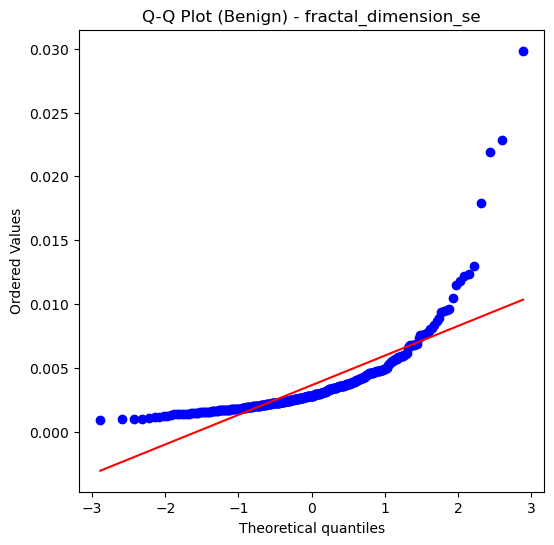

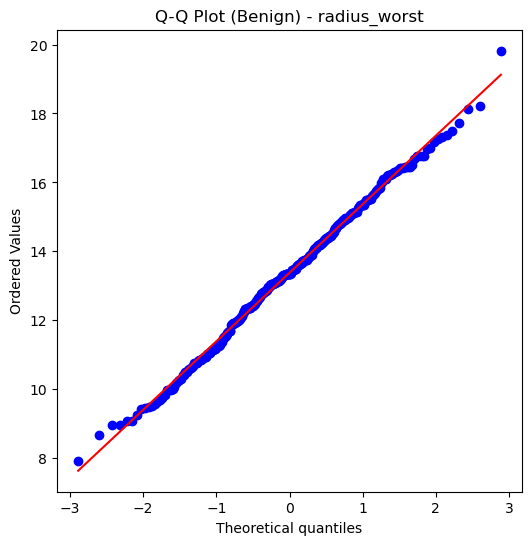

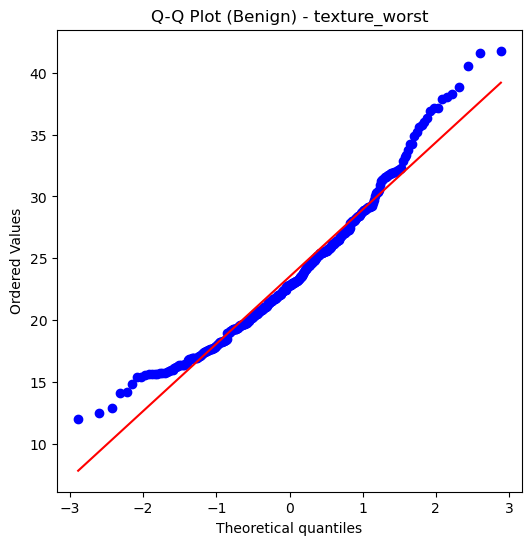

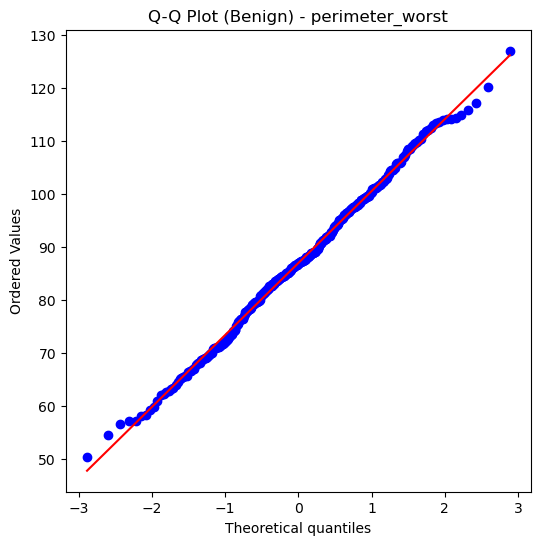

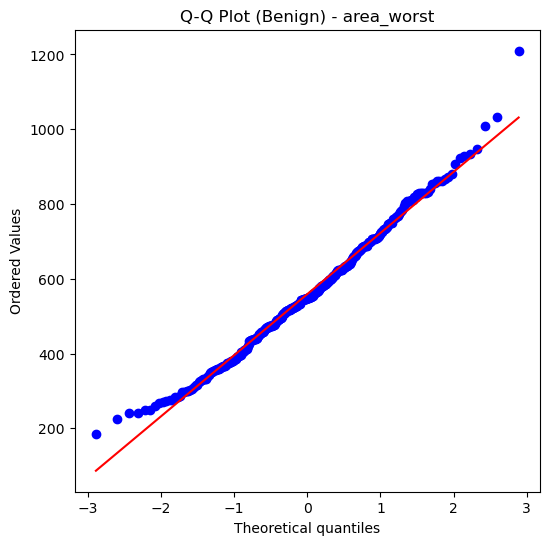

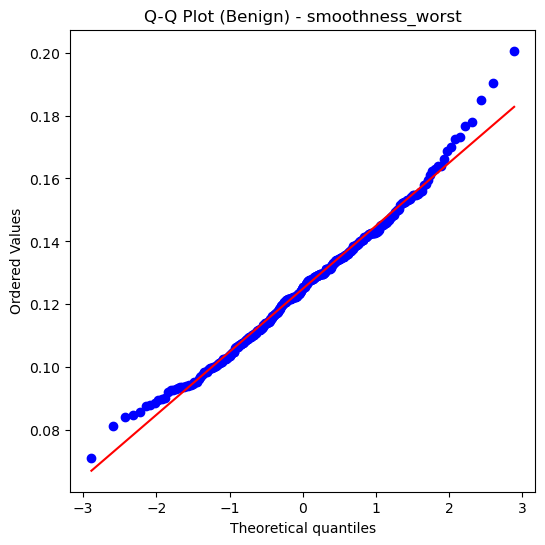

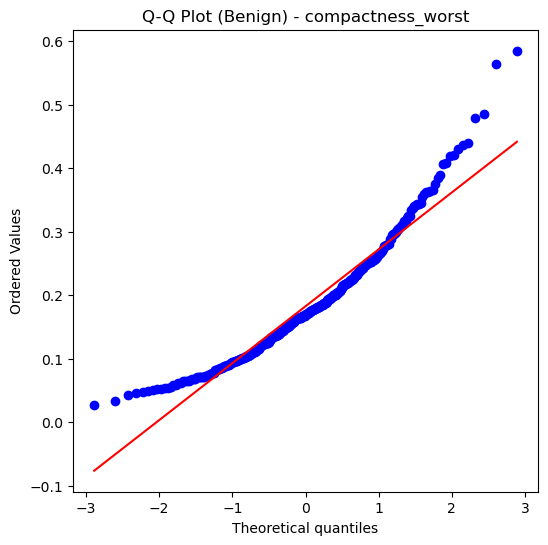

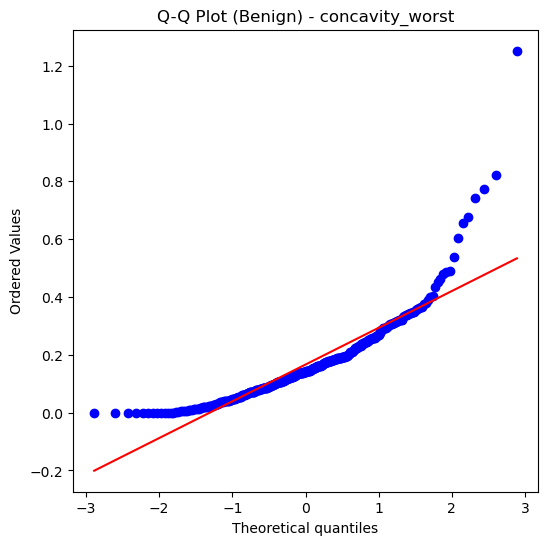

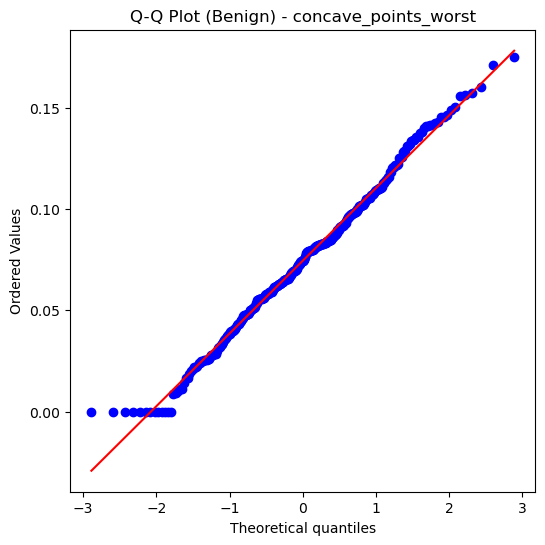

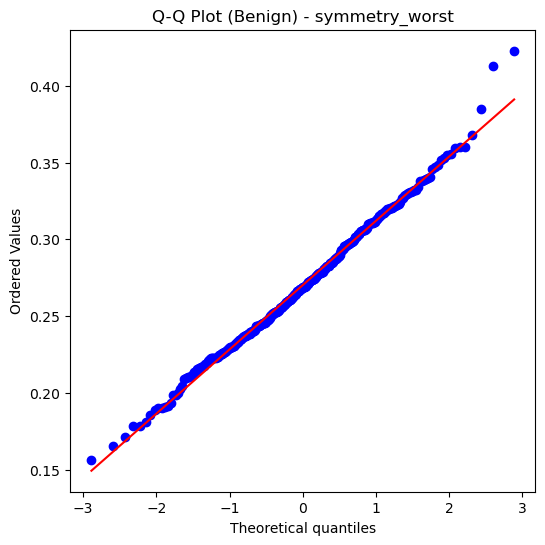

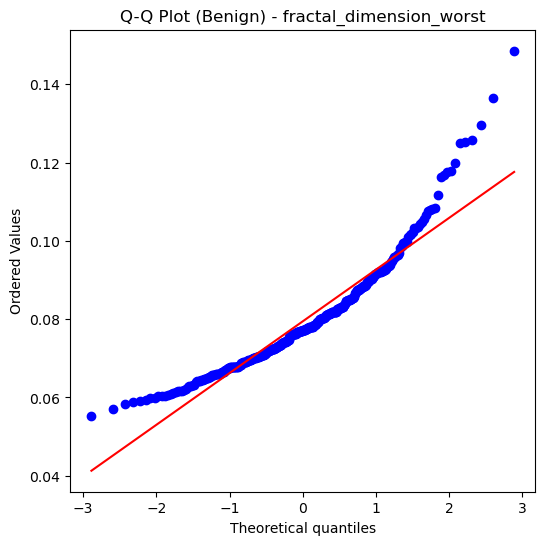

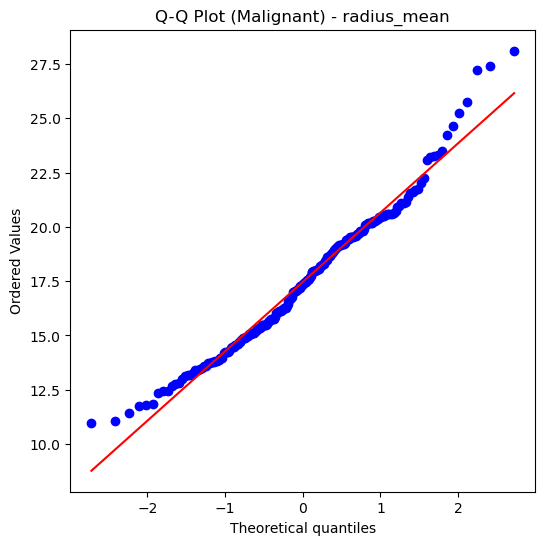

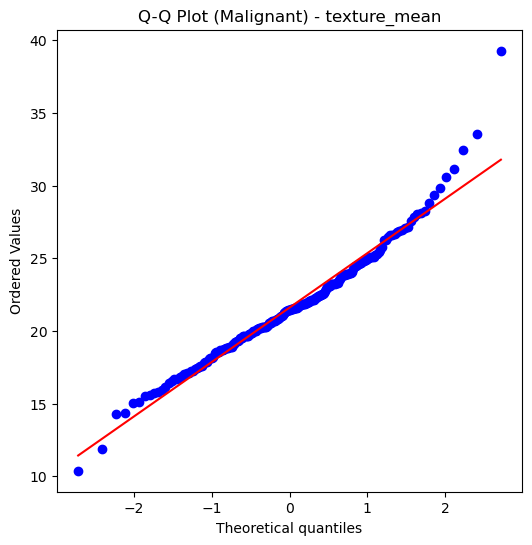

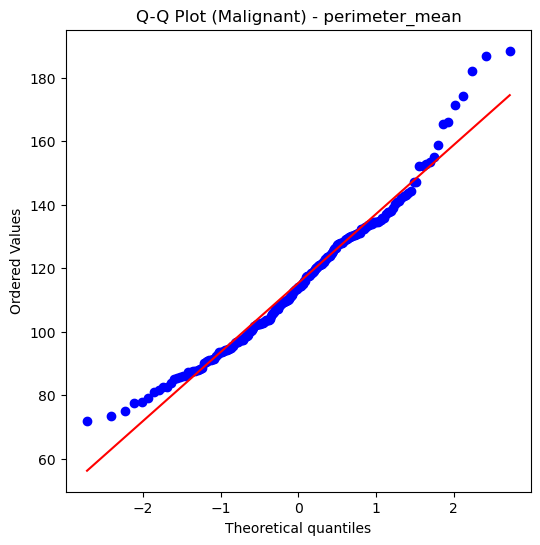

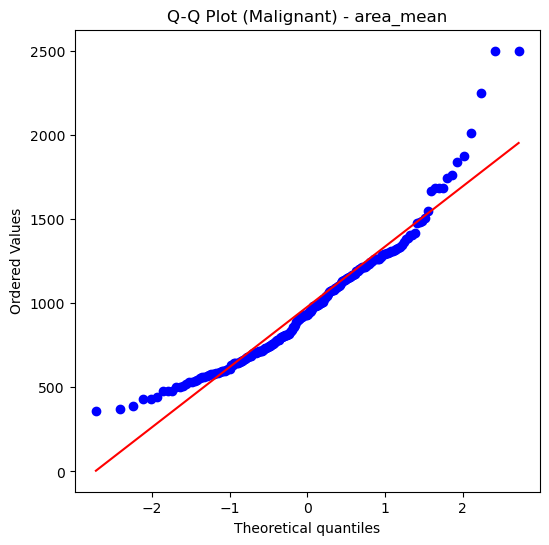

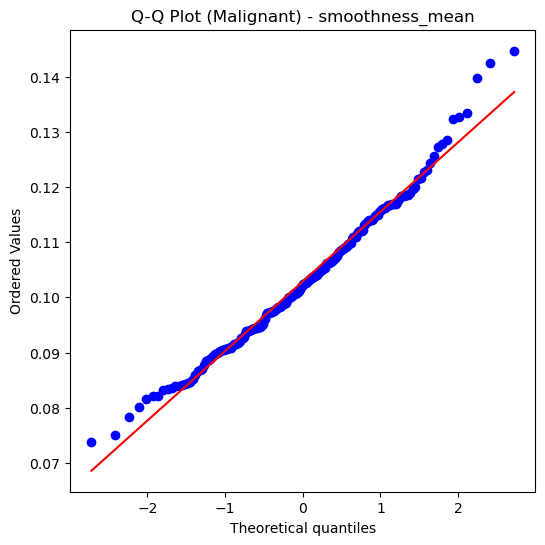

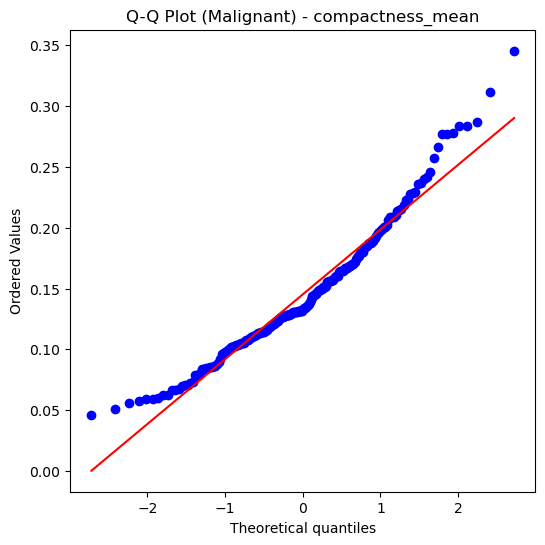

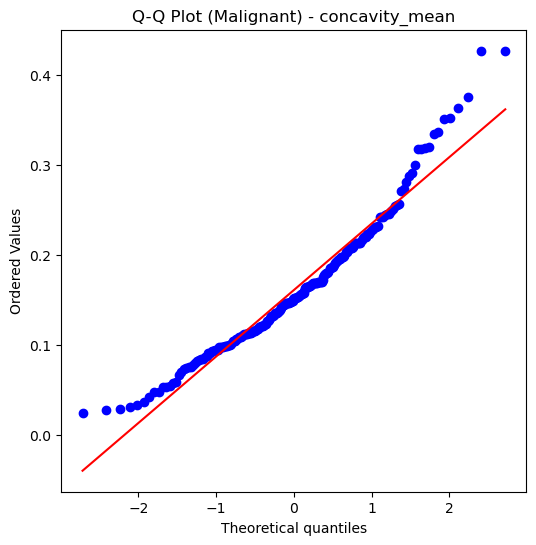

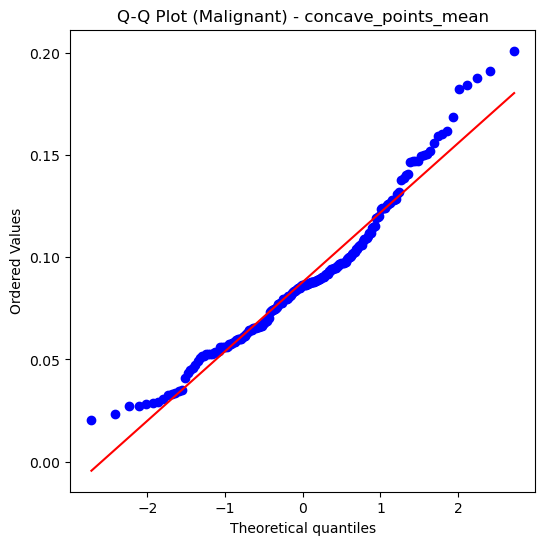

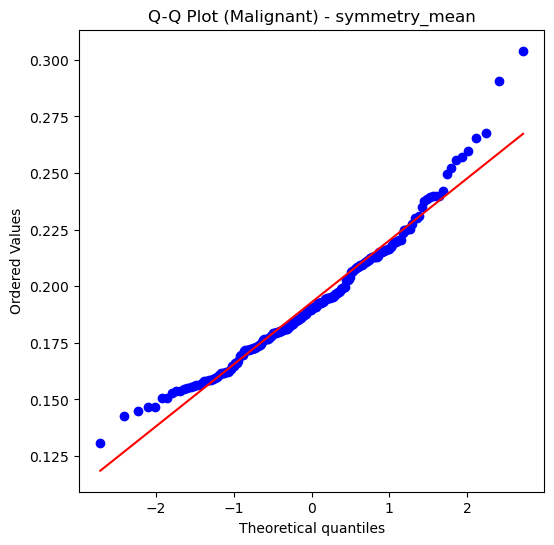

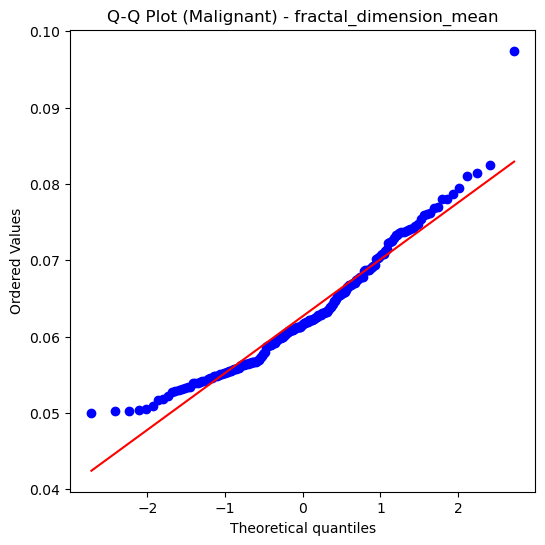

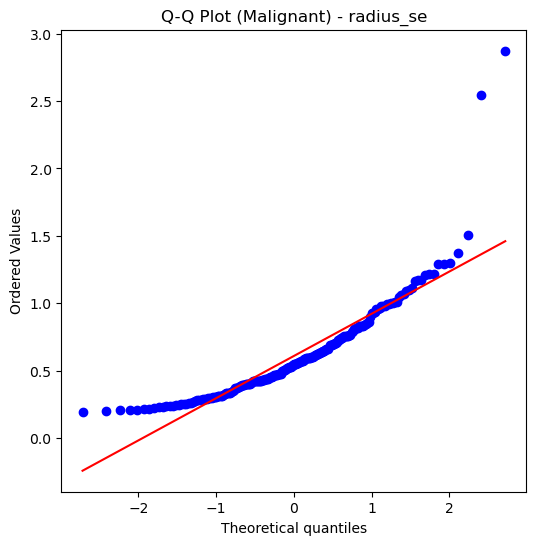

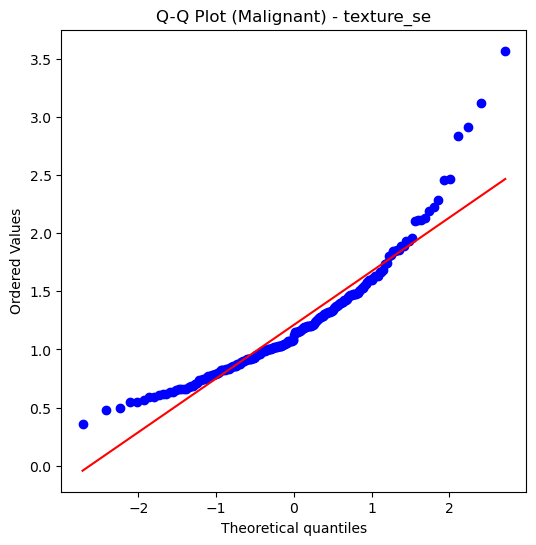

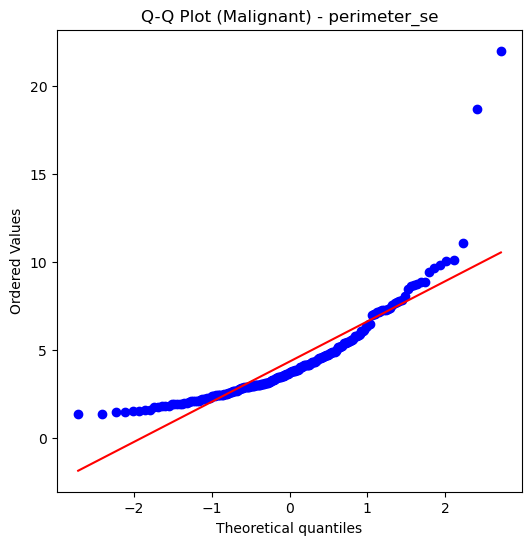

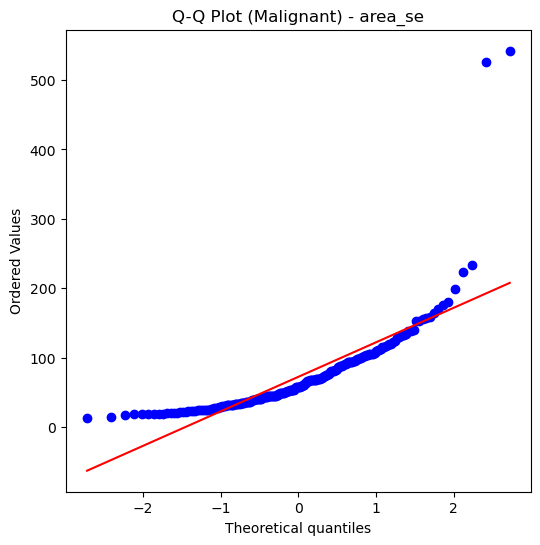

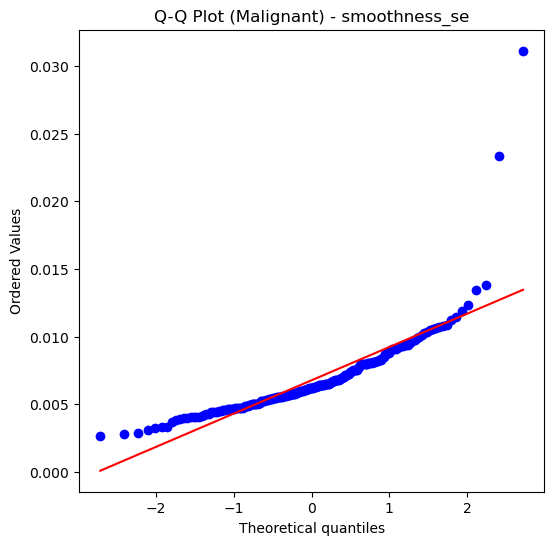

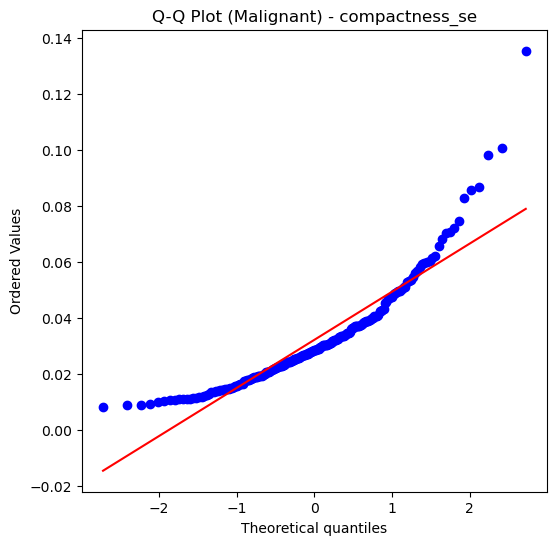

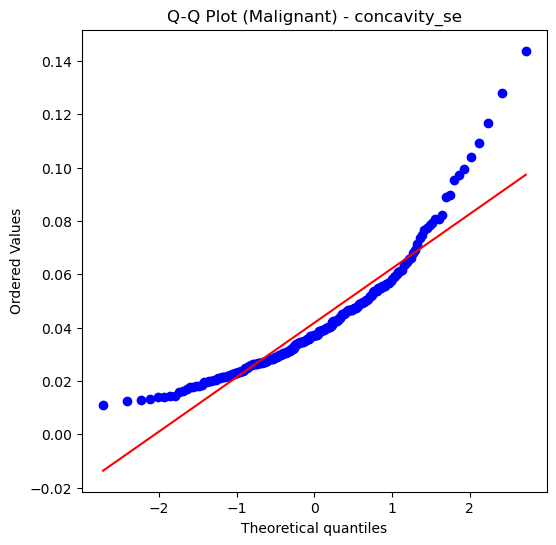

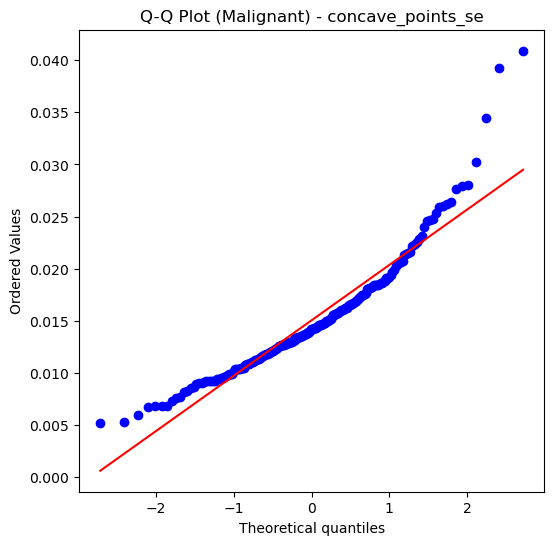

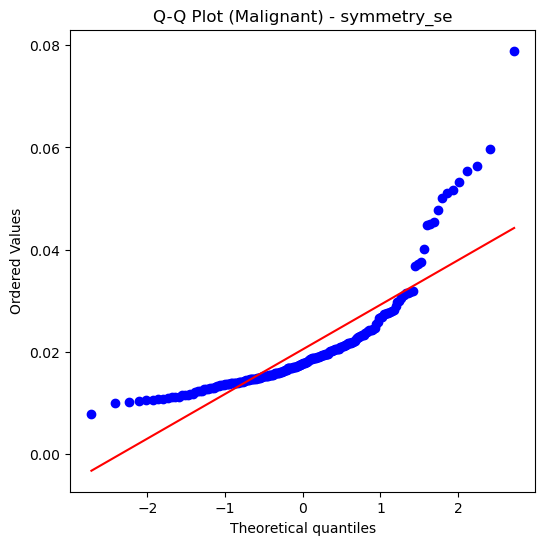

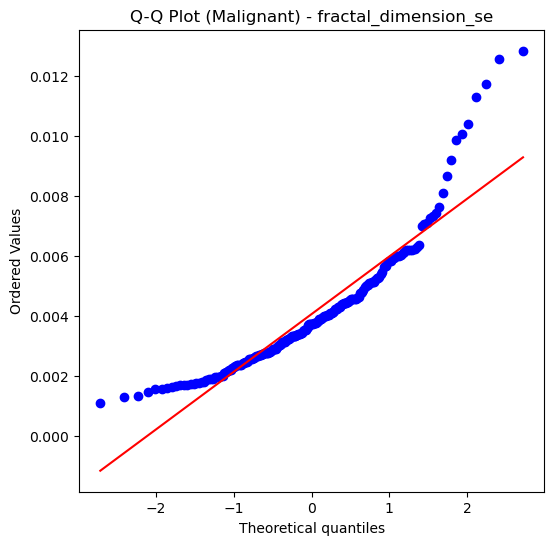

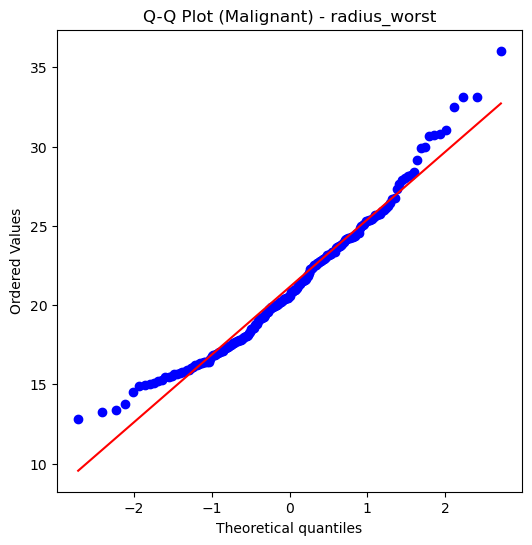

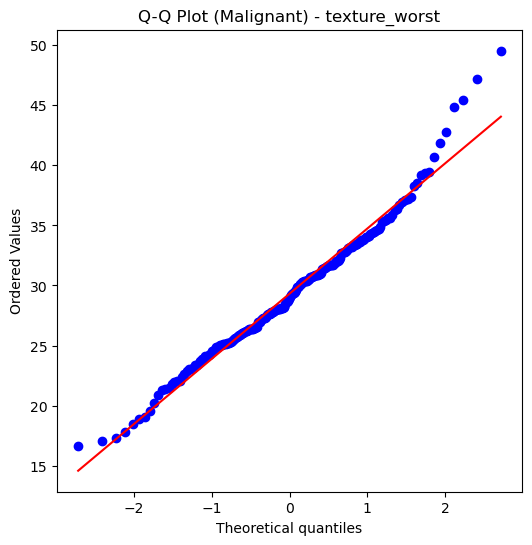

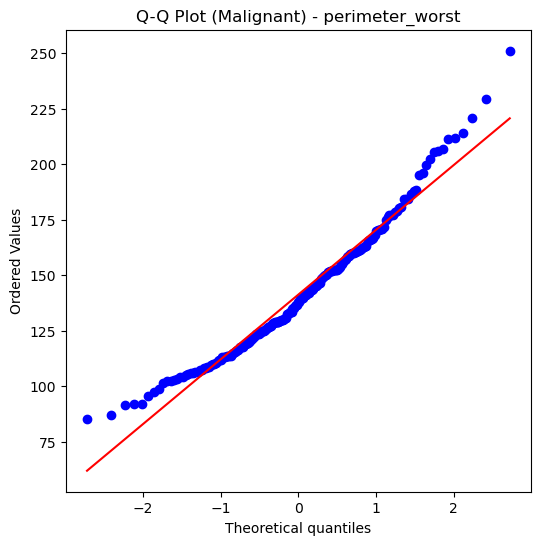

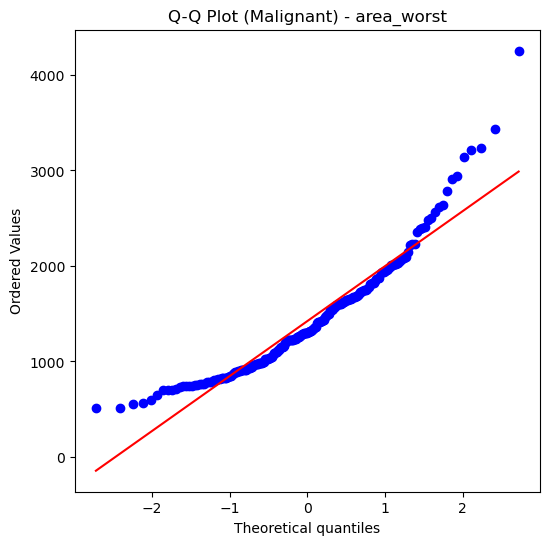

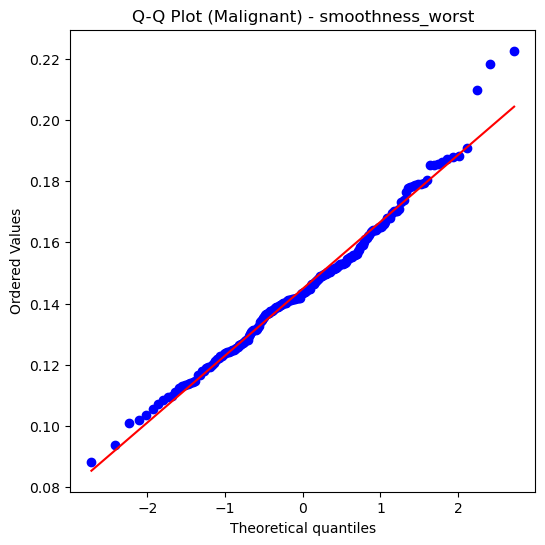

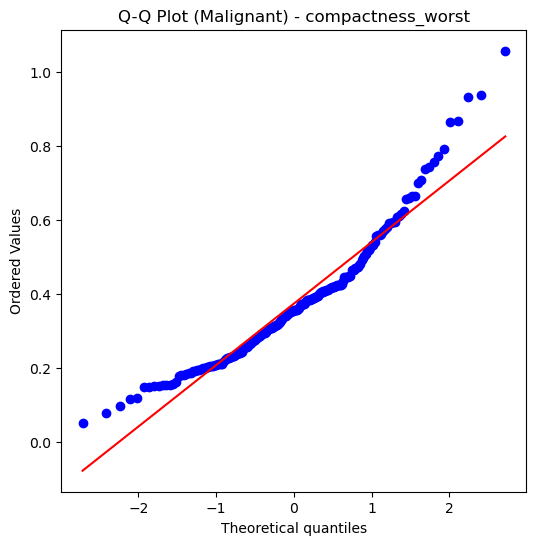

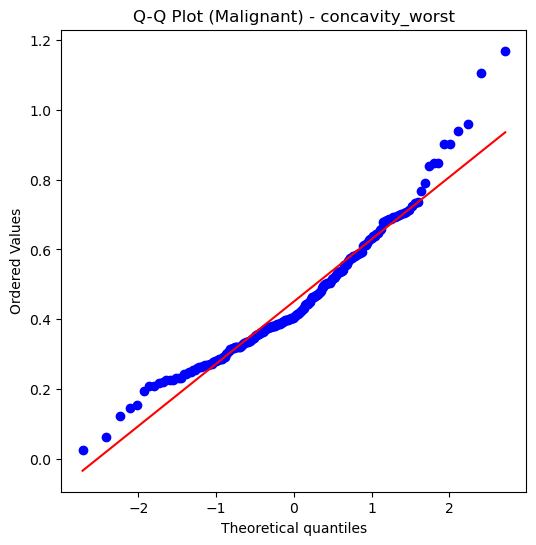

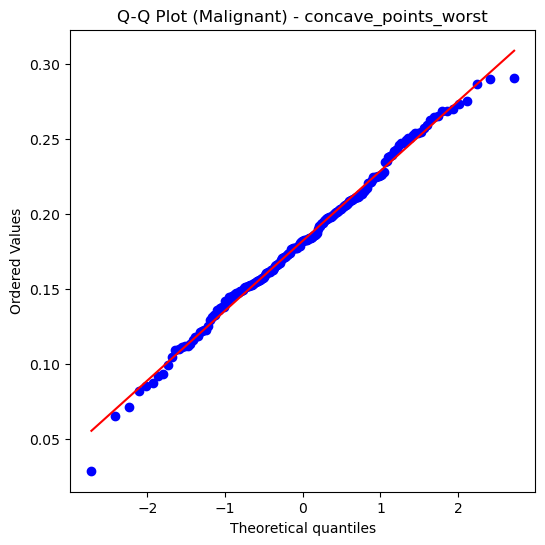

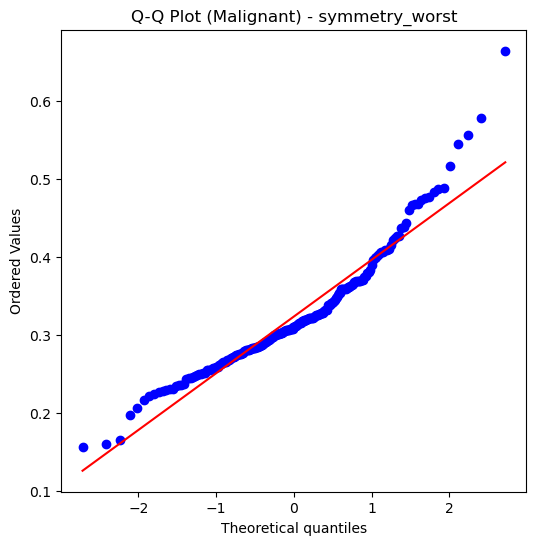

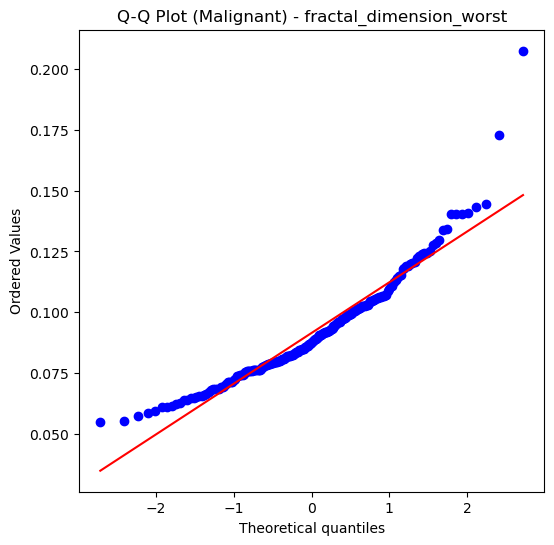

In [13]:
#Create Q-Q plot for each variable by group Diagnosis

for variable in features:
    # Q-Q Plot for Benign group (Diagnosis == 0)
    plt.figure(figsize=(6, 6))
    stats.probplot(df[df['Diagnosis'] == 0][variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot (Benign) - {variable}')
    plt.show()

for variable in features:
    # Q-Q Plot for Malignant group (Diagnosis == 1)
    plt.figure(figsize=(6, 6))
    stats.probplot(df[df['Diagnosis'] == 1][variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot (Malignant) - {variable}')
    plt.show()

In [14]:
from scipy.stats import chi2

def box_m_test(X, groups):
    # X: dataframe of features
    # groups: categorical group labels (e.g., diagnosis)
    
    X = X.copy()
    groups = np.asarray(groups)
    group_labels = np.unique(groups)
    
    n_groups = len(group_labels)
    n_total, n_features = X.shape

    cov_pooled = np.zeros((n_features, n_features))
    logdets = []
    ns = []

    for label in group_labels:
        group_data = X[groups == label]
        n = group_data.shape[0]
        cov = np.cov(group_data, rowvar=False)
        cov_pooled += (n - 1) * cov
        logdets.append(np.log(np.linalg.det(cov)))
        ns.append(n)

    cov_pooled /= (n_total - n_groups)
    pooled_logdet = np.log(np.linalg.det(cov_pooled))

    M = 0
    for i in range(n_groups):
        M += (ns[i] - 1) * (pooled_logdet - logdets[i])
    
    c = ((2 * n_features**2 + 3 * n_features - 1) /
         (6 * (sum(ns) - n_groups))) * (sum([1 / (n - 1) for n in ns]) - 1 / (sum(ns) - n_groups))
    
    chi2_stat = M * (1 - c)
    df = (n_groups - 1) * n_features * (n_features + 1) / 2
    p_value = 1 - chi2.cdf(chi2_stat, df)

    return {
        'Chi2': chi2_stat,
        'df': df,
        'p-value': p_value,
        'equal_cov': p_value > 0.05
    }

# Prepare your data
# diagnosis should already be mapped: M=1, B=0
X = df.drop(columns=['Diagnosis'])  # numeric features only
y = df['Diagnosis']

# Run Box's M Test
results = box_m_test(X, y)

# Print results clearly
print("📊 Box’s M Test Results")
print("-----------------------")
print(f"Chi-square statistic : {results['Chi2']:.4f}")
print(f"Degrees of freedom   : {results['df']:.1f}")
print(f"P-value              : {results['p-value']:.4f}")
print(f"Equal covariance?    : {results['equal_cov']}")

# Interpretation
print("\n🧠 Interpretation:")
if results['p-value'] < 0.05:
    print("🚫 Reject the null hypothesis: The group covariance matrices are significantly different.")
    print("⚠️ This violates the assumption of equal covariance matrices (required for LDA).")
else:
    print("✅ Fail to reject the null hypothesis: The covariance matrices are not significantly different.")
    print("👍 Assumption of equal covariance holds — LDA is appropriate.")

📊 Box’s M Test Results
-----------------------
Chi-square statistic : 7525.5182
Degrees of freedom   : 496.0
P-value              : 0.0000
Equal covariance?    : False

🧠 Interpretation:
🚫 Reject the null hypothesis: The group covariance matrices are significantly different.
⚠️ This violates the assumption of equal covariance matrices (required for LDA).


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = features

# Calculate VIF and Tolerance
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data['Tolerance'] = 1 / vif_data["VIF"]

# Display results
print(vif_data)

# Interpretation
print("\n📌 VIF Interpretation Guide:")
print(" - VIF ≈ 1: No multicollinearity")
print(" - VIF 1–5: Moderate correlation, usually acceptable")
print(" - VIF > 5: High correlation — consider removing or combining variables")
print(" - Tolerance < 0.2: Potential multicollinearity concern")

# Optional: Flag high-VIF features
high_vif = vif_data[vif_data['VIF'] > 5]
if not high_vif.empty:
    print("\n⚠️ Features with VIF > 5 (possible multicollinearity):")
    print(high_vif)
else:
    print("\n✅ No features show strong multicollinearity (VIF > 5).")

                   features           VIF  Tolerance
0               radius_mean  63306.172036   0.000016
1              texture_mean    251.047108   0.003983
2            perimeter_mean  58123.586079   0.000017
3                 area_mean   1287.262339   0.000777
4           smoothness_mean    393.398166   0.002542
5          compactness_mean    200.980354   0.004976
6            concavity_mean    157.855046   0.006335
7       concave_points_mean    154.241268   0.006483
8             symmetry_mean    184.426558   0.005422
9    fractal_dimension_mean    629.679874   0.001588
10                radius_se    236.665738   0.004225
11               texture_se     24.675367   0.040526
12             perimeter_se    211.396334   0.004730
13                  area_se     72.466468   0.013799
14            smoothness_se     26.170243   0.038211
15           compactness_se     44.919651   0.022262
16             concavity_se     33.244099   0.030081
17        concave_points_se     53.698656   0.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

#Run PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(features)
print(f"Number of PCA Components: {pca.n_components_}")

Number of PCA Components: 1


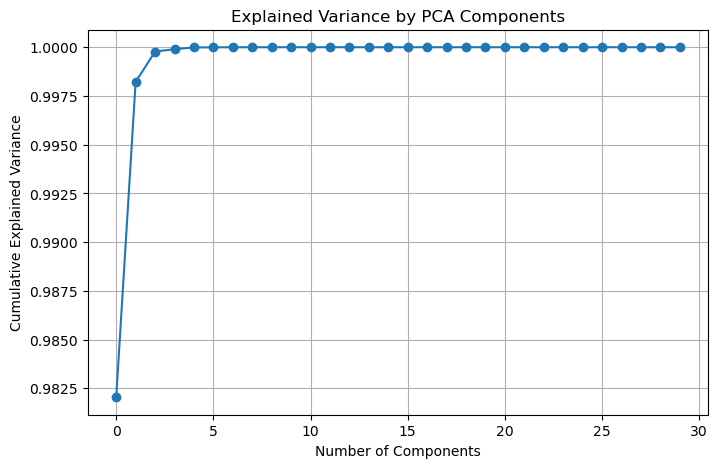

In [17]:
#Run PCA for variance distribution

pca_full = PCA().fit(features)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [18]:
#Inspect PC1
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1'],
    index=features.columns
)

# Show sorted contributions
print(loadings.abs().sort_values('PC1', ascending=False))

                                  PC1
area_worst               8.520634e-01
area_mean                5.168265e-01
area_se                  5.572717e-02
perimeter_worst          4.945764e-02
perimeter_mean           3.507633e-02
radius_worst             7.154733e-03
radius_mean              5.086232e-03
texture_worst            3.067366e-03
perimeter_se             2.236342e-03
texture_mean             2.196570e-03
radius_se                3.137425e-04
concavity_worst          1.689286e-04
compactness_worst        1.012759e-04
concavity_mean           8.193995e-05
concave_points_worst     7.366582e-05
texture_se               6.509840e-05
concave_points_mean      4.778078e-05
compactness_mean         4.052600e-05
symmetry_worst           1.789863e-05
concavity_se             8.870945e-06
symmetry_mean            7.078043e-06
smoothness_worst         6.420055e-06
compactness_se           5.519182e-06
smoothness_mean          4.236945e-06
concave_points_se        3.279150e-06
fractal_dime

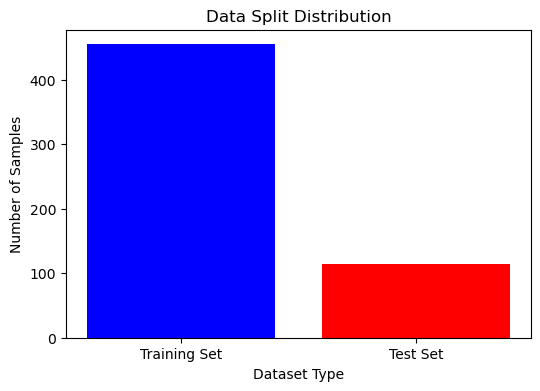

{'Training Set': 455, 'Test Set': 114}

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Split into training (80%) and test(20%) for validation/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Verify the split
split_sizes = {
    "Training Set": len(y_train),
    "Test Set": len(y_test)
}

#Plot diagram
plt.figure(figsize=(6, 4))
plt.bar(split_sizes.keys(), split_sizes.values(), color=['blue', 'red'])
plt.xlabel('Dataset Type')
plt.ylabel('Number of Samples')
plt.title('Data Split Distribution')
plt.show()

#Display dataset sizes
split_sizes

In [20]:
#QDA Model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

In [31]:
# Extract parameters
qda_means = qda.means_
qda_priors = qda.priors_

# Calculate covariance matrices manually
qda_covs = []
for i in range(len(qda_means)):
    class_data = X_train[y_train == i]
    cov_matrix = np.cov(class_data, rowvar=False)
    qda_covs.append(cov_matrix)

# Convert to numpy array
qda_covs = np.array(qda_covs)

# Get covariance matrix shape info
cov_shape = (len(qda_covs),) + qda_covs[0].shape

# Print results clearly
print("📊 QDA Model Summary")
print("------------------------")
print(f"Shape of class mean vectors: {qda_means.shape}")
print(f"Shape of covariance matrices: {cov_shape}")
print(f"Priors: {qda_priors}")

print("\n🔵 Mean vector (Benign - class 0):")
print(qda_means[0])

print("\n🔴 Mean vector (Malignant - class 1):")
print(qda_means[1])

📊 QDA Model Summary
------------------------
Shape of class mean vectors: (2, 1)
Shape of covariance matrices: (2,)
Priors: [0.62857143 0.37142857]

🔵 Mean vector (Benign - class 0):
[-372.30764867]

🔴 Mean vector (Malignant - class 1):
[621.02608899]


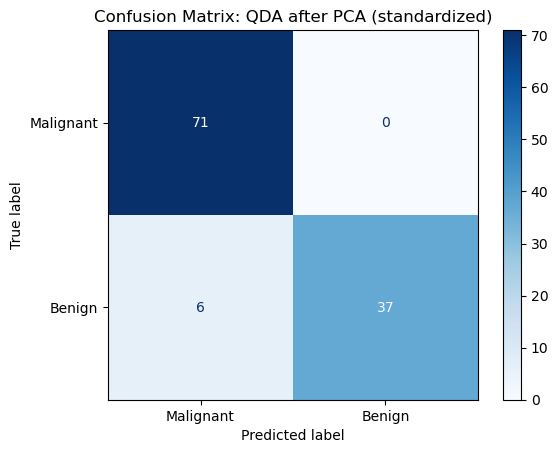

🔍 Classification Report:

              precision    recall  f1-score   support

   Malignant       0.92      1.00      0.96        71
      Benign       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: QDA after PCA (standardized)")
plt.grid(False)
plt.show()

#Classification report
report = classification_report(y_test, y_pred, target_names=["Malignant", "Benign"])
print("🔍 Classification Report:\n")
print(report)

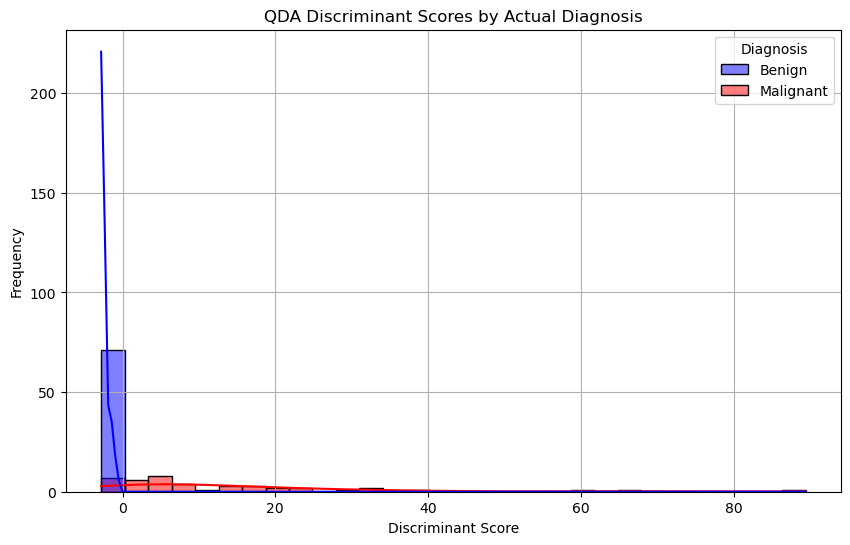

In [24]:
# Get discriminant scores and actual labels
qda_scores = qda.decision_function(X_test)

# Create a DataFrame for plotting
qda_score_df = pd.DataFrame({
    'Score': qda_scores,
    'Diagnosis': y_test.map({0: 'Benign', 1: 'Malignant'}).values
})

# Now plot with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=qda_score_df, x='Score', hue='Diagnosis', kde=True, bins=30,
             palette={'Benign': 'blue', 'Malignant': 'red'}, alpha=0.5)
plt.title("QDA Discriminant Scores by Actual Diagnosis")
plt.xlabel("Discriminant Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()